In [1]:
#!pip install wordcloud

In [ ]:
#get frequency of ratings, freq of words in each rating, freq of words total


In [198]:
#!pip install spacy
#!pip install -U textblob
#!conda install -c conda-forge textblob

^C


In [197]:
#!pip install textblob

In [199]:
#!python -m textblob.download_corpora


Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\bobby\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bobby\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bobby\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bobby\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\bobby\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\bobby\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import os
import warnings
import time
import re
import nltk
import bs4
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import make_scorer, confusion_matrix, hamming_loss, accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans

from keras.models import Sequential
from keras.layers import Dense , Dropout , LSTM , Bidirectional , Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Activation, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D 


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import zipfile

import logging
from scipy.sparse import hstack

warnings.filterwarnings("ignore")
plt.style.use('bmh')
%matplotlib inline

In [107]:
import spacy
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

In [108]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Documents/UNT NLP Course/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [109]:
hotel=pd.read_csv("tripadvisor_hotel_reviews.csv")
hotel.head()

,Review,Rating
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy n...",4
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroo...",2
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book medit...",3
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish named brandi enjoyed, did n't partake free wine coffee/tea service lobby thought great feature, great staff friendly, free wireless interne...",5
4,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk package, no charge parking got voucher taxi, problem taxi driver did n't want accept voucher barely spoke english, funny thing speak arabic called started making comments girlfriend cell phone buddy, took second realize just said fact speak language ...",5


In [123]:
import re
from typing import Union, List

class CleanText():
    """ clearing text except digits () . , word character """ 

    def __init__(self, clean_pattern = r"[^A-ZĞÜŞİÖÇIa-zğüı'şöç0-9.\"',()]"):
        self.clean_pattern =clean_pattern

    def __call__(self, text: Union[str, list]) -> List[List[str]]:

        if isinstance(text, str):
            docs = [[text]]

        if isinstance(text, list):
            docs = text

        text = [[re.sub(self.clean_pattern, " ", sent) for sent in sents] for sents in docs]

        return text
    
def remove_emoji(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def tokenize(text):
    """ basic tokenize method with word character, non word character and digits """
    text = re.sub(r" +", " ", str(text))
    text = re.split(r"(\d+|[a-zA-ZğüşıöçĞÜŞİÖÇ]+|\W)", text)
    text = list(filter(lambda x: x != '' and x != ' ', text))
    sent_tokenized = ' '.join(text)
    return sent_tokenized

regex = re.compile('[%s]' % re.escape(string.punctuation))

def remove_punct(text):
    text = regex.sub(" ", text)
    return text

clean = CleanText()

In [126]:
df = hotel
# encode label and mapping label name
#df["label"] = hotel["Rating"].apply(lambda x: label_encode(x))
#df["label_name"] = df["label"].apply(lambda x: label2name(x))

# clean text, lowercase and remove punk
df["Review"] = hotel["Review"].apply(lambda x: remove_punct(clean(remove_emoji(x).lower())[0][0]))


In [127]:
# tokenize data
df["tokenized_review"] = df.Review.apply(lambda x: tokenize(x))
# calculate token count for any sent
df["sent_token_length"] = df["tokenized_review"].apply(lambda x: len(x.split()))

In [1]:
#!pip install wordcloud


In [128]:
df.head()

,Review,Rating,tokenized_review,sent_token_length
0,nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy n...,4,nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy neighbo...,88
1,ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle start booked suite paid extra website description not suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroo...,2,ok nothing special charge diamond member hilton decided chain shot 20 th anniversary seattle start booked suite paid extra website description not suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroom un...,258
2,nice rooms not 4 experience hotel monaco seattle good hotel n t 4 level positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed 3 separate wakeup calls concierge busy hard touch did n t provide guidance special requests tv hard use ipod sound dock suite non functioning decided book medit...,3,nice rooms not 4 experience hotel monaco seattle good hotel n t 4 level positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed 3 separate wakeup calls concierge busy hard touch did n t provide guidance special requests tv hard use ipod sound dock suite non functioning decided book mediterrane...,237
3,unique great stay wonderful time hotel monaco location excellent short stroll main downtown shopping area pet friendly room showed no signs animal hair smells monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy goldfish named brandi enjoyed did n t partake free wine coffee tea service lobby thought great feature great staff friendly free wireless interne...,5,unique great stay wonderful time hotel monaco location excellent short stroll main downtown shopping area pet friendly room showed no signs animal hair smells monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy goldfish named brandi enjoyed did n t partake free wine coffee tea service lobby thought great feature great staff friendly free wireless internet hotel w...,92
4,great stay great stay went seahawk game awesome downfall view building did n t complain room huge staff helpful booked hotels website seahawk package no charge parking got voucher taxi problem taxi driver did n t want accept voucher barely spoke english funny thing speak arabic called started making comments girlfriend cell phone buddy took second realize just said fact speak language ...,5,great stay great stay went seahawk game awesome downfall view building did n t complain room huge staff helpful booked hotels website seahawk package no charge parking got voucher taxi problem taxi driver did n t want accept voucher barely spoke english funny thing speak arabic called started making comments girlfriend cell phone buddy took second 

In [ ]:
#get frequency of ratings, freq of words in each rating, freq of words total


In [198]:
#!pip install spacy
#!pip install -U textblob
!conda install -c conda-forge textblob

^C


In [197]:
!pip install textblob

In [199]:
!python -m textblob.download_corpora


Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\bobby\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bobby\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bobby\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bobby\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\bobby\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\bobby\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import os
import warnings
import time
import re
import nltk
import bs4
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import make_scorer, confusion_matrix, hamming_loss, accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans

from keras.models import Sequential
from keras.layers import Dense , Dropout , LSTM , Bidirectional , Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Activation, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D 


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import zipfile

import logging
from scipy.sparse import hstack

warnings.filterwarnings("ignore")
plt.style.use('bmh')
%matplotlib inline

In [192]:
import spacy
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Documents/UNT NLP Course/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [35]:
hotel=pd.read_csv("tripadvisor_hotel_reviews.csv")
hotel.head()

,Review,Rating
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy n...",4
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroo...",2
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book medit...",3
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish named brandi enjoyed, did n't partake free wine coffee/tea service lobby thought great feature, great staff friendly, free wireless interne...",5
4,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk package, no charge parking got voucher taxi, problem taxi driver did n't want accept voucher barely spoke english, funny thing speak arabic called started making comments girlfriend cell phone buddy, took second realize just said fact speak language ...",5


In [5]:
#!pip install --upgrade xarray

In [4]:
#!pip install plotly

In [36]:
from wordcloud import WordCloud,STOPWORDS
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Flatten,Dropout,Embedding
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from nltk.stem import WordNetLemmatizer
from collections import Counter
import re

pd.set_option('max_colwidth', 400)

In [306]:
def unique_words(word,rating=None):
    words=[]
    stopwords=set(STOPWORDS)
    some_more_common_words=set(['hotel','room','rooms'])
    stopwords.update(some_more_common_words)
    copy=hotel['Review']
    if rating!=None:
        copy=hotel[hotel['Rating']==rating]['Review']
    for y in copy:
        s=y.split(" ")
        for x in s:
            if x.isalpha() and x not in stopwords:
                words.append(x)
    return np.array(Counter(words).most_common(word))

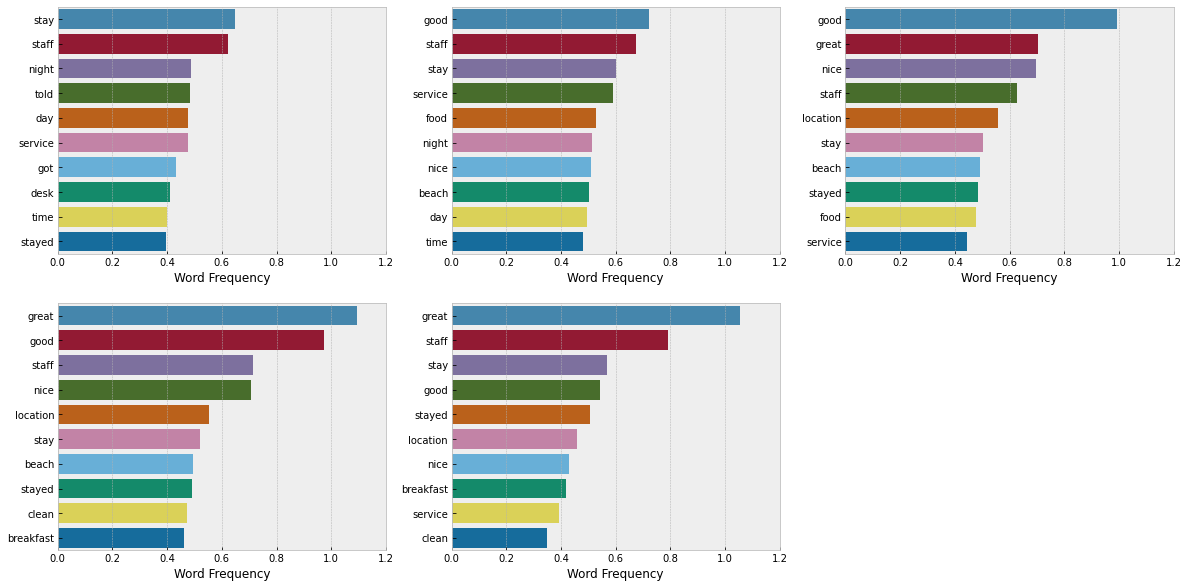

In [307]:
fig=plt.figure(figsize=(20,10))
counts=Counter(hotel['Rating'])
for rating in range(1,6):
    rated=unique_words(word=10,rating=rating)
    plt.subplot(2,3,rating)
    plt.xlabel('Word Frequency')
    plt.xlim([0,1.2])
    sns.barplot(y=rated[:,0],x=rated[:,1].astype(int)/counts[rating])
plt.show()

In [308]:
s=set()
stop=set(STOPWORDS)
lemma=WordNetLemmatizer()
for x in hotel['Review']:
    x=re.sub('[^A-Za-z]'," ",x)
    x=x.split(" ")
    for w in x:
        w=lemma.lemmatize(w)
        if w not in stop:
            s.add(w)
len(s)#number of distinct words

44760

In [309]:
def lemmatizer(x):
    x=re.sub('[^A-Za-z]',' ',x)
    s=x.split(" ")
    h=[]
    for y in s:
        y=lemma.lemmatize(y)
        if y not in stop:
            h.append(y)
    return " ".join(h)      

In [310]:
hotel['lemm_text']=hotel['Review'].apply(lambda x: lemmatizer(x))

In [311]:
hotel.head()

display(hotel['lemm_text'])

0        nice hotel expensive parking got good deal stay hotel anniversary  arrived late evening took advice previous review valet parking  check quick easy  little disappointed non existent view room room clean nice size  bed comfortable woke stiff neck high pillow  soundproof heard music room night morning loud bang door opening closing hear people talking hallway  maybe noisy neighbor  aveda bath pr...
1        ok nothing special charge diamond member hilton decided chain shot   th anniversary seattle  start booked suite paid extra website description  suite bedroom bathroom standard hotel room  took printed reservation desk showed said thing tv couch ect desk clerk told oh mixed suite description kimpton website sorry free breakfast  got kidding  embassy suit sitting room bathroom bedroom unlike kim...
2        nice room    experience hotel monaco seattle good hotel n t    level positive large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives

In [312]:
num_words=20000
tokenizer=Tokenizer(num_words=num_words,oov_token='OOV')
tokenizer.fit_on_texts(hotel['lemm_text'])
tokenized_text=tokenizer.texts_to_sequences(hotel['lemm_text'])
np.mean([len(x) for x in tokenized_text])

99.82797325655166

In [313]:
length=100
tokenized_text=pad_sequences(tokenized_text,length,padding='post',truncating='post')
output=to_categorical(hotel['Rating'])
output=output[:,1:]

## Explore NlP Text get word frequency

In [129]:
import pandas as pd
import matplotlib.pyplot as plt


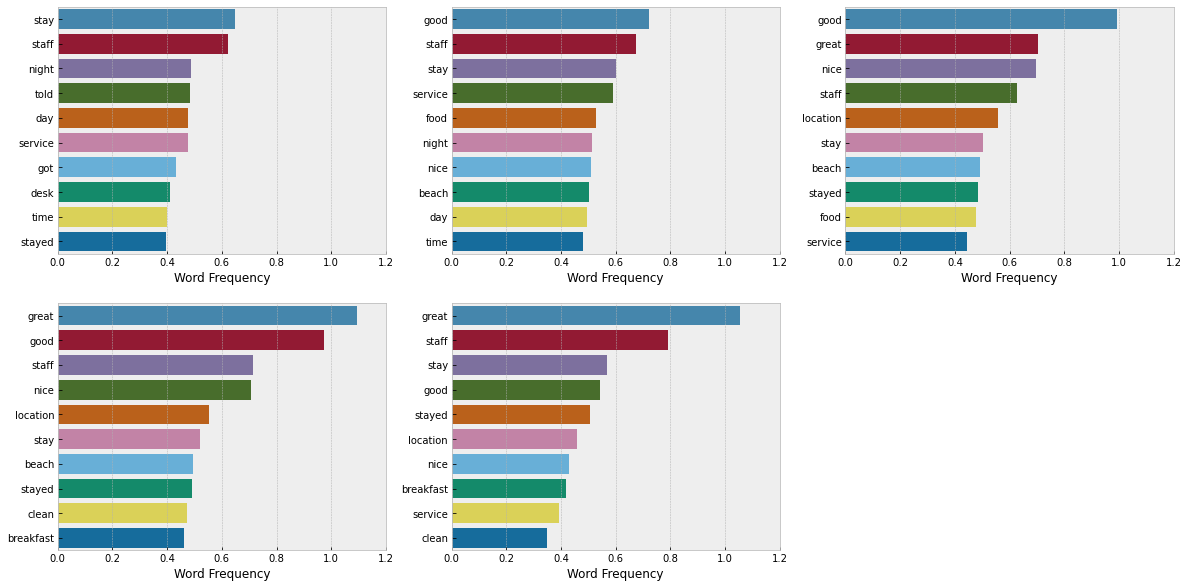

In [316]:
'''
# use explode to expand the lists into separate rows
hotel_dfe = hotel.lemm_text.explode().to_frame().reset_index(drop=True)

# groupby the values in the column, get the count and sort
hotel_dfg = hotel_dfe.groupby('lemm_text').lemm_text.count() \
                               .reset_index(name='count') \
                               .sort_values(['count'], ascending=False) \
                               .head(10).reset_index(drop=True)

display(hotel_dfg)

'''


fig=plt.figure(figsize=(20,10))
counts=Counter(hotel['Rating'])
for rating in range(1,6):
    rated=unique_words(word=10,rating=rating)
    plt.subplot(2,3,rating)
    plt.xlabel('Word Frequency')
    plt.xlim([0,1.2])
    sns.barplot(y=rated[:,0],x=rated[:,1].astype(int)/counts[rating])
plt.show()

In [317]:
h=hotel

h['count']=hotel['lemm_text'].str.count(' ') + 1
h.head()

,Review,Rating,lemm_text,count
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy n...",4,nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous review valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillow soundproof heard music room night morning loud bang door opening closing hear people talking hallway maybe noisy neighbor aveda bath pr...,96
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroo...",2,ok nothing special charge diamond member hilton decided chain shot th anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard hotel room took printed reservation desk showed said thing tv couch ect desk clerk told oh mixed suite description kimpton website sorry free breakfast got kidding embassy suit sitting room bathroom bedroom unlike kim...,274
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book medit...",3,nice room experience hotel monaco seattle good hotel n t level positive large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed separate wakeup call concierge busy hard touch n t provide guidance special request tv hard use ipod sound dock suite non functioning decided book mediterranean sui...,263
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish named brandi enjoyed, did n't partake free wine coffee/tea service lobby thought great feature, great staff friendly, free wireless interne...",5,unique great stay wonderful time hotel monaco location excellent short stroll main downtown shopping area pet friendly room showed sign animal hair smell monaco suite sleeping area big striped curtain pulled closed nice touch felt cosy goldfish named brandi enjoyed n t partake free wine coffee tea service lobby thought great feature great staff friendly free wireless internet hotel wo...,103
4,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk package, no charge parking got voucher taxi, problem taxi driver did n't want accept voucher barely spoke english, funny thing speak arabic called started making comments girlfriend cell phone buddy, took second realize just said fact speak language ...",5,great stay great stay went seahawk game awesome downfall view building n t complain room huge staff helpful booked hotel website seahawk package charge parking got voucher taxi problem taxi driver n t want accept voucher barely spoke english funny thing speak arabic called started making comment girlfriend cell phone buddy took second realize said fact spea

In [142]:
#Get unique words

unique = set(df['lemmatized'].str.lower().str.findall("\w+").sum())

In [ ]:
unique

,Review,Rating,tokenized_review,sent_token_length
0,nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy n...,4,nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy neighbo...,88
1,ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle start booked suite paid extra website description not suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroo...,2,ok nothing special charge diamond member hilton decided chain shot 20 th anniversary seattle start booked suite paid extra website description not suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroom un...,258
2,nice rooms not 4 experience hotel monaco seattle good hotel n t 4 level positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed 3 separate wakeup calls concierge busy hard touch did n t provide guidance special requests tv hard use ipod sound dock suite non functioning decided book medit...,3,nice rooms not 4 experience hotel monaco seattle good hotel n t 4 level positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed 3 separate wakeup calls concierge busy hard touch did n t provide guidance special requests tv hard use ipod sound dock suite non functioning decided book mediterrane...,237
3,unique great stay wonderful time hotel monaco location excellent short stroll main downtown shopping area pet friendly room showed no signs animal hair smells monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy goldfish named brandi enjoyed did n t partake free wine coffee tea service lobby thought great feature great staff friendly free wireless interne...,5,unique great stay wonderful time hotel monaco location excellent short stroll main downtown shopping area pet friendly room showed no signs animal hair smells monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy goldfish named brandi enjoyed did n t partake free wine coffee tea service lobby thought great feature great staff friendly free wireless internet hotel w...,92
4,great stay great stay went seahawk game awesome downfall view building did n t complain room huge staff helpful booked hotels website seahawk package no charge parking got voucher taxi problem taxi driver did n t want accept voucher barely spoke english funny thing speak arabic called started making comments girlfriend cell phone buddy took second realize just said fact speak language ...,5,great stay great stay went seahawk game awesome downfall view building did n t complain room huge staff helpful booked hotels website seahawk package no charge parking got voucher taxi problem taxi driver did n t want accept voucher barely spoke english funny thing speak arabic called started making comments girlfriend cell phone buddy took second 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

In [132]:
from collections import Counter
from itertools import chain

counter = Counter(chain.from_iterable(map(str.split, df.Review.tolist()))) 

In [133]:
series = pd.Series(counter).sort_values(ascending=False)
series

hotel            49877
room             35357
not              31711
great            21482
t                19534
                 ...  
refridgerater        1
bernadins            1
mastering            1
picnics              1
swears               1
Length: 51781, dtype: int64

In [134]:
series.iloc[0:20]

hotel       49877
room        35357
not         31711
great       21482
t           19534
n           19105
good        17419
staff       16637
stay        15413
did         14007
just        12667
nice        12646
rooms       12407
no          11846
location    11353
stayed      10500
service     10373
night       10164
time        10132
beach       10068
dtype: int64

https://sparkbyexamples.com/pandas/pandas-series-filter/#:~:text=By%20using%20Series.filter%20%28%29%20function%20you%20can%20filter,object%20whose%20index%20label%20name%20has%20a%20space.

In [154]:
# repeat this again at the end
# filter() index by labels

ser2 = series.filter(items = ['cost', 'price', 'criminal', 'hooker', 'drugs', 'inside','drug', 'food', 'pool'
                                'service', 'parking', 'space', 'ac', 'location', 'smoking' , 'neighborhood'])

#cost, crime history, amenities, flexibility, parking, indoor facility, room space, air-conditioning, and neighborhood 
print(ser2)

cost             1460
price            4934
criminal           10
hooker              8
inside            661
drug               56
food             9688
parking          1694
space            1301
ac                330
location        11560
smoking           683
neighborhood      513
dtype: int64


<AxesSubplot:title={'center':'Count of Words in Hotel Review'}, ylabel='Count of Words'>

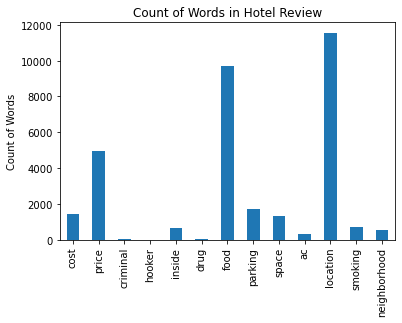

In [165]:
# create the bar plot
ax = ser2.plot(kind='bar')
# rotate xtick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
# set the y-axis label
ax.set_ylabel("Count of Words")
# set the title
ax.set_title("Count of Words in Hotel Review")
ser2.plot.bar(x='bar')

In [260]:


# plot the dataframe
#dfg.plot.bar(x='lemmatized')

## Now find most popular word groupings

# bigrams, # trigrams







In [136]:
# Creating a corpus to identify word groupings perform an overall training on the model. 
corpus_hotel = df['Review'].str.cat(sep=',')


## Group Text by similar ratings

In [137]:
#hotel['Tag'] = tag_df['Rating'].astype(str)

grouped_text = df.groupby("Rating")['Review'].apply(lambda hotel: ' '.join(hotel))
grouped_text1 = grouped_text.reset_index()
grouped_text1.head()

,Rating,Review
0,1,horrible customer service hotel stay february 3rd 4th 2007my friend picked hotel monaco appealing website online package included champagne late checkout 3 free valet gift spa weekend friend checked room hours earlier came later pulled valet young man just stood asked valet open said pull bags didn ç offer help got garment bag suitcase came car key room number says not valet car park...
1,2,ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle start booked suite paid extra website description not suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroo...
2,3,nice rooms not 4 experience hotel monaco seattle good hotel n t 4 level positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed 3 separate wakeup calls concierge busy hard touch did n t provide guidance special requests tv hard use ipod sound dock suite non functioning decided book medit...
3,4,nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy n...
4,5,unique great stay wonderful time hotel monaco location excellent short stroll main downtown shopping area pet friendly room showed no signs animal hair smells monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy goldfish named brandi enjoyed did n t partake free wine coffee tea service lobby thought great feature great staff friendly free wireless interne...


## Find the most frequent words in each of the ratings
https://www.kaggle.com/code/octaviosantana/most-frequent-words

In [200]:
#df = grouped_text1
#df['Tags'] = grouped_text1.lemm_text.apply(lambda x: x[1:-1].split(','))

In [202]:
#df.head()

In [139]:
rating1 = grouped_text1[grouped_text1['Rating']==1]['Review'].str.lower()
rating2 = grouped_text1[grouped_text1['Rating']==2]['Review'].str.lower()
rating3 = grouped_text1[grouped_text1['Rating']==3]['Review'].str.lower()
rating4 = grouped_text1[grouped_text1['Rating']==4]['Review'].str.lower()
rating5 = grouped_text1[grouped_text1['Rating']==5]['Review'].str.lower()

In [140]:
rating1 = rating1.values.tolist()
rating2 = rating2.values.tolist()
rating3 = rating3.values.tolist()
rating4 = rating4.values.tolist()
rating5 = rating5.values.tolist()

In [141]:
rating1_break = [nltk.tokenize.wordpunct_tokenize(text) for text in rating1]
rating2_break = [nltk.tokenize.wordpunct_tokenize(text) for text in rating2]
rating3_break = [nltk.tokenize.wordpunct_tokenize(text) for text in rating3]
rating4_break = [nltk.tokenize.wordpunct_tokenize(text) for text in rating4]
rating5_break = [nltk.tokenize.wordpunct_tokenize(text) for text in rating5]

In [142]:
#rating1_break

In [143]:
stopwords = nltk.corpus.stopwords.words('english')

In [144]:
from itertools import groupby

def clear_multiple_char(comment):        
    ti = []
    for words in comment:
        t = [''.join(["".join(i) for i, _ in groupby(word)]) if len(word)>10 else word for word in words]
        ti.append(t)
    return ti

In [145]:
'''def counter(comment_clear):
    cnt = Counter()
    for words in comment_clear:
        for word in words:
            cnt[word] += 1
    return cnt


'''
import string
from string import punctuation
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
punctuation = string.punctuation # '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
# Add numbers
punctuation += '0123456789'

def comment_raiz(comment):
    text = []
    for lista in comment:
        valids = [stemmer.stem(word) for word in lista if word not in stopwords and word not in punctuation 
                  and len(word)>2]
        valids_true = [''.join([char for char in word if char not in punctuation]) for word in valids if 
                       len(''.join([char for char in word if char not in punctuation]))>0]
        text.append(valids_true)
    return text

In [146]:
rating1_clearend = comment_raiz(rating1_break)
rating2_clearend = comment_raiz(rating2_break)
rating3_clearend = comment_raiz(rating3_break)
rating4_clearend = comment_raiz(rating4_break)
rating5_clearend = comment_raiz(rating5_break)

In [147]:
def counter(comment_clear):
    cnt = Counter()
    for words in comment_clear:
        for word in words:
            cnt[word] += 1
    return cnt

In [148]:
rating1_clearend_count = counter(rating1_clearend)
rating2_clearend_count = counter(rating2_clearend)
rating3_clearend_count = counter(rating3_clearend)
rating4_clearend_count = counter(rating4_clearend)
rating5_clearend_count = counter(rating5_clearend)

In [149]:
rating1_count = counter(rating1_break)
rating2_count = counter(rating2_break)
rating3_count = counter(rating3_break)
rating4_count = counter(rating4_break)
rating5_count = counter(rating5_break)


In [150]:
rating1_clearend_count.most_common(10)

[('room', 4305),
 ('hotel', 4019),
 ('stay', 2074),
 ('day', 1236),
 ('night', 1201),
 ('serv', 1055),
 ('staff', 1005),
 ('tim', 941),
 ('check', 792),
 ('plac', 791)]

In [151]:
rt1 = rating1_count.most_common(20)

In [152]:
from operator import itemgetter
import heapq
import collections
def least_common_values(array, to_find=None):
    counter = collections.Counter(array)
    if to_find is None:
        return sorted(counter.items(), key=itemgetter(1), reverse=False)
    return heapq.nsmallest(to_find, counter.items(), key=itemgetter(1))
#least_common_values(rating1_count)

In [153]:
rating2_clearend_count.most_common(20)

[('room', 5791),
 ('hotel', 4669),
 ('stay', 2556),
 ('night', 1640),
 ('day', 1605),
 ('serv', 1560),
 ('good', 1553),
 ('tim', 1401),
 ('staff', 1342),
 ('nic', 1191),
 ('food', 1177),
 ('resort', 1151),
 ('beach', 1142),
 ('lik', 1126),
 ('loc', 999),
 ('cle', 975),
 ('real', 972),
 ('bed', 965),
 ('gre', 947),
 ('resta', 909)]

In [154]:
rating3_clearend_count.most_common(20)

[('room', 6145),
 ('hotel', 5634),
 ('stay', 2785),
 ('good', 2535),
 ('loc', 1962),
 ('nic', 1952),
 ('night', 1842),
 ('gre', 1787),
 ('staff', 1542),
 ('day', 1541),
 ('serv', 1504),
 ('tim', 1483),
 ('cle', 1423),
 ('beach', 1398),
 ('lik', 1317),
 ('resort', 1253),
 ('food', 1241),
 ('resta', 1202),
 ('pool', 1162),
 ('real', 1146)]

In [155]:
rating4_clearend_count.most_common(20)

[('hotel', 15547),
 ('room', 14320),
 ('stay', 8187),
 ('gre', 7625),
 ('good', 6912),
 ('loc', 5491),
 ('nic', 5275),
 ('staff', 4870),
 ('night', 4563),
 ('cle', 4051),
 ('day', 3989),
 ('tim', 3987),
 ('beach', 3789),
 ('walk', 3755),
 ('serv', 3621),
 ('resta', 3576),
 ('breakfast', 3356),
 ('food', 3146),
 ('real', 2992),
 ('plac', 2985)]

In [156]:
df= rating5_clearend_count.most_common(15)

In [157]:
df[0:20]

[('hotel', 24195),
 ('room', 17427),
 ('stay', 12960),
 ('gre', 10984),
 ('staff', 8059),
 ('loc', 6832),
 ('good', 5929),
 ('night', 5639),
 ('serv', 5332),
 ('tim', 5287),
 ('day', 5099),
 ('nic', 4997),
 ('walk', 4687),
 ('breakfast', 4591),
 ('cle', 4559)]

In [158]:
df1 = pd.DataFrame (rt1, columns = ['rating1_count', 'count'])

In [159]:
df1

,rating1_count,count
0,not,3803
1,hotel,3682
2,room,3368
3,t,1729
4,n,1685
5,no,1609
6,did,1319
7,stay,1234
8,staff,986
9,night,926


### Convert all 5 text rows in ratings to corpus's
https://stackoverflow.com/questions/49088978/how-to-create-corpus-from-pandas-data-frame-to-operate-with-nltk

### Create tags from here: gather bigrams
https://stackoverflow.com/questions/2661778/tag-generation-from-a-text-content

In [163]:
df = grouped_text1
df.count()

Rating    5
Review    5
dtype: int64

In [164]:
df

,Rating,Review
0,1,horrible customer service hotel stay february 3rd 4th 2007my friend picked hotel monaco appealing website online package included champagne late checkout 3 free valet gift spa weekend friend checked room hours earlier came later pulled valet young man just stood asked valet open said pull bags didn ç offer help got garment bag suitcase came car key room number says not valet car park...
1,2,ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle start booked suite paid extra website description not suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroo...
2,3,nice rooms not 4 experience hotel monaco seattle good hotel n t 4 level positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed 3 separate wakeup calls concierge busy hard touch did n t provide guidance special requests tv hard use ipod sound dock suite non functioning decided book medit...
3,4,nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy n...
4,5,unique great stay wonderful time hotel monaco location excellent short stroll main downtown shopping area pet friendly room showed no signs animal hair smells monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy goldfish named brandi enjoyed did n t partake free wine coffee tea service lobby thought great feature great staff friendly free wireless interne...


In [165]:
df1=df
def tokenize(text):
    """ basic tokenize method with word character, non word character and digits """
    text = re.sub(r" +", " ", str(text))
    text = re.split(r"(\d+|[a-zA-ZğüşıöçĞÜŞİÖÇ]+|\W)", text)
    text = list(filter(lambda x: x != '' and x != ' ', text))
    sent_tokenized = ' '.join(text)
    return sent_tokenized


# tokenize data
df1["tokenized_review1"] = df.Review.apply(lambda x: tokenize(x))
# calculate token count for any sent
df1["sent_token_length"] = df["tokenized_review1"].apply(lambda x: len(x.split()))

In [166]:
df1.head()

,Rating,Review,tokenized_review1,sent_token_length
0,1,horrible customer service hotel stay february 3rd 4th 2007my friend picked hotel monaco appealing website online package included champagne late checkout 3 free valet gift spa weekend friend checked room hours earlier came later pulled valet young man just stood asked valet open said pull bags didn ç offer help got garment bag suitcase came car key room number says not valet car park...,horrible customer service hotel stay february 3 rd 4 th 2007 my friend picked hotel monaco appealing website online package included champagne late checkout 3 free valet gift spa weekend friend checked room hours earlier came later pulled valet young man just stood asked valet open said pull bags didn ç offer help got garment bag suitcase came car key room number says not valet car park car st...,167301
1,2,ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle start booked suite paid extra website description not suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroo...,ok nothing special charge diamond member hilton decided chain shot 20 th anniversary seattle start booked suite paid extra website description not suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroom un...,238091
2,3,nice rooms not 4 experience hotel monaco seattle good hotel n t 4 level positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed 3 separate wakeup calls concierge busy hard touch did n t provide guidance special requests tv hard use ipod sound dock suite non functioning decided book medit...,nice rooms not 4 experience hotel monaco seattle good hotel n t 4 level positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed 3 separate wakeup calls concierge busy hard touch did n t provide guidance special requests tv hard use ipod sound dock suite non functioning decided book mediterrane...,262939
3,4,nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy n...,nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy neighbo...,681438
4,5,unique great stay wonderful time hotel monaco location excellent short stroll main downtown shopping area pet friendly room showed no signs animal hair smells monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy goldfish named brandi enjoyed did n t partake free wine coffee tea service lobby thought great feature great staff friendly free wireless interne...,unique great stay wonderful time hotel monaco location excellent short stroll main downtown shopping area pet friendly room showed no signs animal hair smells monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy goldfish named brandi enjoyed did n t partake free wine coffee tea service lobby thought great 

### count the tokens per rating

In [168]:
from nltk.tokenize import word_tokenize
df1['tokenized_text'] = df['Review'].apply(word_tokenize) 

In [169]:
df1.head()

,Rating,Review,tokenized_review1,sent_token_length,tokenized_text
0,1,horrible customer service hotel stay february 3rd 4th 2007my friend picked hotel monaco appealing website online package included champagne late checkout 3 free valet gift spa weekend friend checked room hours earlier came later pulled valet young man just stood asked valet open said pull bags didn ç offer help got garment bag suitcase came car key room number says not valet car park...,horrible customer service hotel stay february 3 rd 4 th 2007 my friend picked hotel monaco appealing website online package included champagne late checkout 3 free valet gift spa weekend friend checked room hours earlier came later pulled valet young man just stood asked valet open said pull bags didn ç offer help got garment bag suitcase came car key room number says not valet car park car st...,167301,"[horrible, customer, service, hotel, stay, february, 3rd, 4th, 2007my, friend, picked, hotel, monaco, appealing, website, online, package, included, champagne, late, checkout, 3, free, valet, gift, spa, weekend, friend, checked, room, hours, earlier, came, later, pulled, valet, young, man, just, stood, asked, valet, open, said, pull, bags, didn, ç, offer, help, got, garment, bag, suitcase, cam..."
1,2,ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle start booked suite paid extra website description not suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroo...,ok nothing special charge diamond member hilton decided chain shot 20 th anniversary seattle start booked suite paid extra website description not suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroom un...,238091,"[ok, nothing, special, charge, diamond, member, hilton, decided, chain, shot, 20th, anniversary, seattle, start, booked, suite, paid, extra, website, description, not, suite, bedroom, bathroom, standard, hotel, room, took, printed, reservation, desk, showed, said, things, like, tv, couch, ect, desk, clerk, told, oh, mixed, suites, description, kimpton, website, sorry, free, breakfast, got, kid..."
2,3,nice rooms not 4 experience hotel monaco seattle good hotel n t 4 level positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed 3 separate wakeup calls concierge busy hard touch did n t provide guidance special requests tv hard use ipod sound dock suite non functioning decided book medit...,nice rooms not 4 experience hotel monaco seattle good hotel n t 4 level positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed 3 separate wakeup calls concierge busy hard touch did n t provide guidance special requests tv hard use ipod sound dock suite non functioning decided book mediterrane...,262939,"[nice, rooms, not, 4, experience, hotel, monaco, seattle, good, hotel, n, t, 4, level, positives, large, bathroom, mediterranean, suite, comfortable, bed, pillowsattentive, housekeeping, staffnegatives, ac, unit, malfunctioned, stay, desk, disorganized, missed, 3, separate, wakeup, calls, concierge, busy, hard, touch, did, n, t, provide, guidance, special, requests, tv, hard, use, ipod, sound,..."
3,4,nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning l

In [170]:

df1['bigrams'] = df1['tokenized_text'].apply(lambda row: list(nltk.ngrams(row, 2)))

In [171]:
df1.head()

,Rating,Review,tokenized_review1,sent_token_length,tokenized_text,bigrams
0,1,horrible customer service hotel stay february 3rd 4th 2007my friend picked hotel monaco appealing website online package included champagne late checkout 3 free valet gift spa weekend friend checked room hours earlier came later pulled valet young man just stood asked valet open said pull bags didn ç offer help got garment bag suitcase came car key room number says not valet car park...,horrible customer service hotel stay february 3 rd 4 th 2007 my friend picked hotel monaco appealing website online package included champagne late checkout 3 free valet gift spa weekend friend checked room hours earlier came later pulled valet young man just stood asked valet open said pull bags didn ç offer help got garment bag suitcase came car key room number says not valet car park car st...,167301,"[horrible, customer, service, hotel, stay, february, 3rd, 4th, 2007my, friend, picked, hotel, monaco, appealing, website, online, package, included, champagne, late, checkout, 3, free, valet, gift, spa, weekend, friend, checked, room, hours, earlier, came, later, pulled, valet, young, man, just, stood, asked, valet, open, said, pull, bags, didn, ç, offer, help, got, garment, bag, suitcase, cam...","[(horrible, customer), (customer, service), (service, hotel), (hotel, stay), (stay, february), (february, 3rd), (3rd, 4th), (4th, 2007my), (2007my, friend), (friend, picked), (picked, hotel), (hotel, monaco), (monaco, appealing), (appealing, website), (website, online), (online, package), (package, included), (included, champagne), (champagne, late), (late, checkout), (checkout, 3), (3, free),..."
1,2,ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle start booked suite paid extra website description not suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroo...,ok nothing special charge diamond member hilton decided chain shot 20 th anniversary seattle start booked suite paid extra website description not suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroom un...,238091,"[ok, nothing, special, charge, diamond, member, hilton, decided, chain, shot, 20th, anniversary, seattle, start, booked, suite, paid, extra, website, description, not, suite, bedroom, bathroom, standard, hotel, room, took, printed, reservation, desk, showed, said, things, like, tv, couch, ect, desk, clerk, told, oh, mixed, suites, description, kimpton, website, sorry, free, breakfast, got, kid...","[(ok, nothing), (nothing, special), (special, charge), (charge, diamond), (diamond, member), (member, hilton), (hilton, decided), (decided, chain), (chain, shot), (shot, 20th), (20th, anniversary), (anniversary, seattle), (seattle, start), (start, booked), (booked, suite), (suite, paid), (paid, extra), (extra, website), (website, description), (description, not), (not, suite), (suite, bedroom)..."
2,3,nice rooms not 4 experience hotel monaco seattle good hotel n t 4 level positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed 3 separate wakeup calls concierge busy hard touch did n t provide guidance special requests tv hard use ipod sound dock suite non functioning decided book medit...,nice rooms not 4 experience hotel monaco seattle good hotel n t 4 level positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed 3 separate wakeup calls concierge busy hard touch did n t provide guidance special 

In [172]:
df1.to_csv('trip_advisr_tokens_bigrams.csv')

In [173]:
df2 = df1['bigrams']
df2 = df1.groupby('Rating').agg({'bigrams': 'sum'})

# Compute the most frequent bigrams by category
from collections import Counter
df2['bigrams_counter'] = df2.bigrams.apply(lambda row: Counter(row)).to_frame()

In [174]:
df2.head(1)

,bigrams,bigrams_counter
Rating,,
1,"[(horrible, customer), (customer, service), (service, hotel), (hotel, stay), (stay, february), (february, 3rd), (3rd, 4th), (4th, 2007my), (2007my, friend), (friend, picked), (picked, hotel), (hotel, monaco), (monaco, appealing), (appealing, website), (website, online), (online, package), (package, included), (included, champagne), (champagne, late), (late, checkout), (checkout, 3), (3, free),...","{('horrible', 'customer'): 6, ('customer', 'service'): 108, ('service', 'hotel'): 25, ('hotel', 'stay'): 34, ('stay', 'february'): 1, ('february', '3rd'): 1, ('3rd', '4th'): 1, ('4th', '2007my'): 1, ('2007my', 'friend'): 1, ('friend', 'picked'): 1, ('picked', 'hotel'): 2, ('hotel', 'monaco'): 1, ('monaco', 'appealing'): 1, ('appealing', 'website'): 1, ('website', 'online'): 2, ('online', 'pack..."


In [175]:
df3 = df2.reset_index()

In [176]:
df3.dtypes

Rating              int64
bigrams            object
bigrams_counter    object
dtype: object

In [177]:
df3.to_csv('trip_advisor_bigrams.csv')

In [178]:
rating1_bigram = df3[df3['Rating']==1]['bigrams']
rating2_bigram = df3[df3['Rating']==2]['bigrams']
rating3_bigram = df3[df3['Rating']==3]['bigrams']
rating4_bigram = df3[df3['Rating']==4]['bigrams']
rating5_bigram = df3[df3['Rating']==5]['bigrams']


In [179]:
def counter(comment_clear):
    cnt = Counter()
    for words in comment_clear:
        for word in words:
            cnt[word] += 1
    return cnt

In [180]:
rating1_bigram_count = counter(rating1_bigram)
rating2_bigram_count = counter(rating2_bigram)
rating3_bigram_count = counter(rating3_bigram)
rating4_bigram_count = counter(rating4_bigram)
rating5_bigram_count = counter(rating5_bigram)


In [181]:
rating1_bigram_count = pd.DataFrame(rating1_bigram_count.most_common(30), columns=['bigrams','count'])
rating2_bigram_count = pd.DataFrame(rating2_bigram_count.most_common(30), columns=['bigrams','count'])
rating3_bigram_count = pd.DataFrame(rating3_bigram_count.most_common(30), columns=['bigrams','count'])
rating4_bigram_count = pd.DataFrame(rating4_bigram_count.most_common(30), columns=['bigrams','count'])
rating5_bigram_count = pd.DataFrame(rating5_bigram_count.most_common(30), columns=['bigrams','count'])

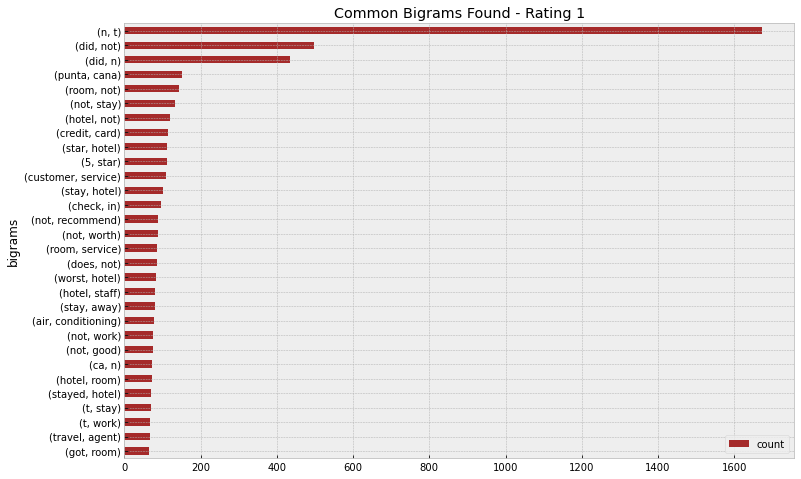

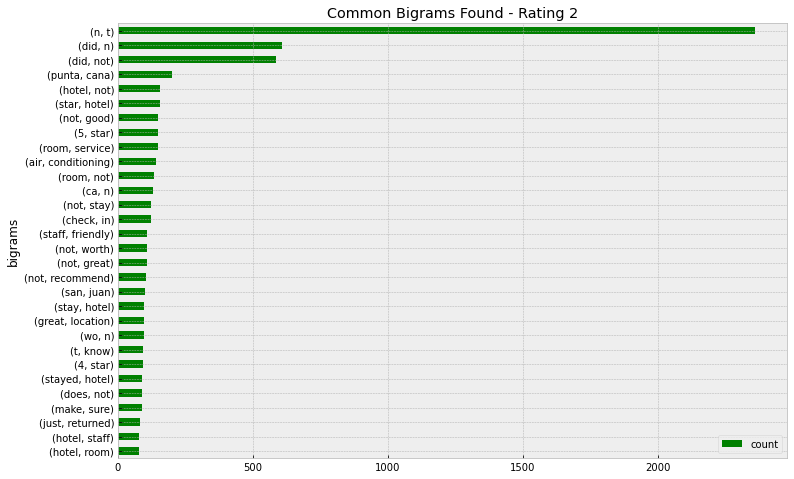

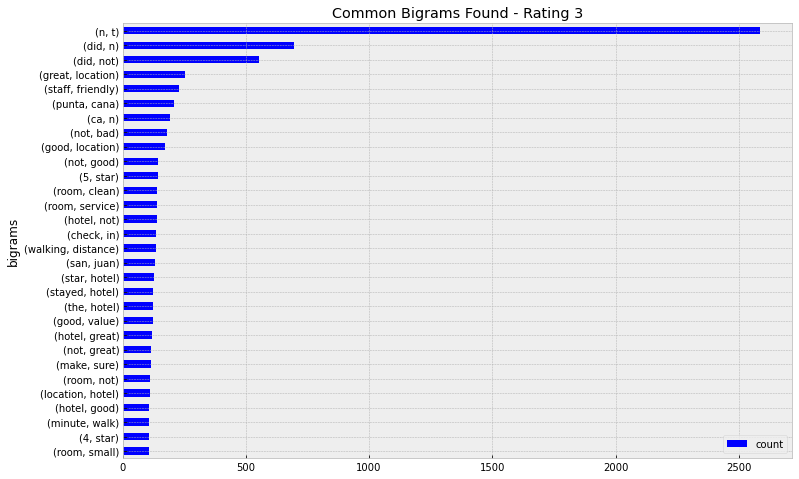

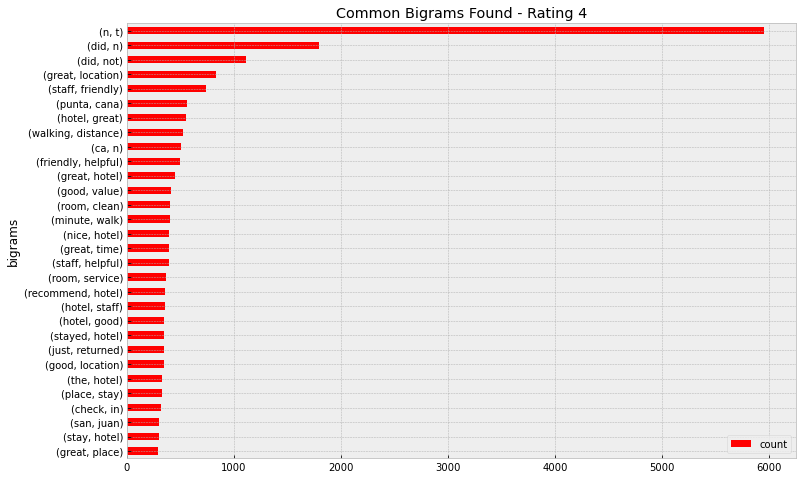

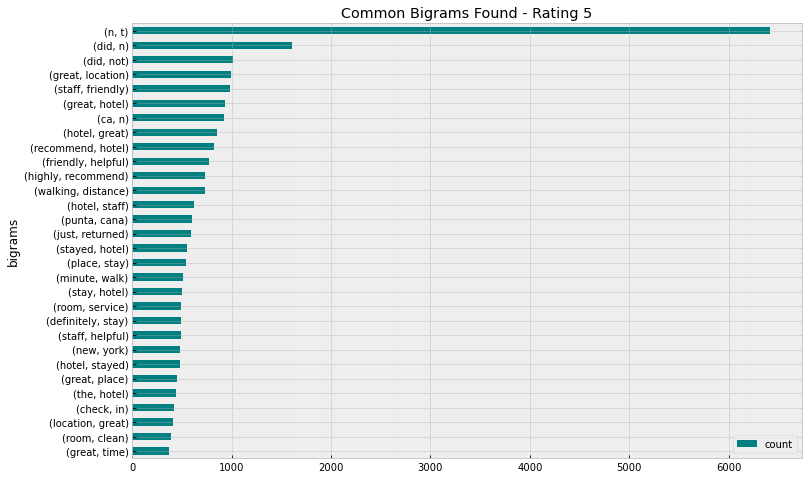

In [182]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
rating1_bigram_count.sort_values(by='count').plot.barh(x='bigrams',
                      y='count',
                      ax=ax,
                      color="brown")
ax.set_title("Common Bigrams Found - Rating 1")
plt.show()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
rating2_bigram_count.sort_values(by='count').plot.barh(x='bigrams',
                      y='count',
                      ax=ax,
                      color="green")
ax.set_title("Common Bigrams Found - Rating 2")
plt.show()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
rating3_bigram_count.sort_values(by='count').plot.barh(x='bigrams',
                      y='count',
                      ax=ax,
                      color="blue")
ax.set_title("Common Bigrams Found - Rating 3")
plt.show()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
rating4_bigram_count.sort_values(by='count').plot.barh(x='bigrams',
                      y='count',
                      ax=ax,
                      color="red")
ax.set_title("Common Bigrams Found - Rating 4")
plt.show()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
rating5_bigram_count.sort_values(by='count').plot.barh(x='bigrams',
                      y='count',
                      ax=ax,
                      color="teal")
ax.set_title("Common Bigrams Found - Rating 5")
plt.show()

In [337]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def _get_top_ngram(corpus, n=None):
    #getting top ngrams
    vec = CountVectorizer(ngram_range=(n, n),
                          max_df=0.9,
                          ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:15]

# unigram
fig = make_subplots(rows=1, cols=5)

title_ = ["1", "2", "3", "4", "5"]

for i in range(5):
    texts = df[df["Rating"] == i]['lemm_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    top_n_bigrams = _get_top_ngram(texts, 2)[:15]
    x, y = map(list, zip(*top_n_bigrams))


    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='Most Common unigrams per Classes',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))      
fig.show()

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [327]:


def CreateCorpusFromDataFrame(corpusfolder,df):
    for index, r in df.iterrows():
        #id=r['ID']
        title=r['rating1_count']
        #body=r['BODY']
        #category=r['CATEGORY']
        fname=str(title)+'_'+'.txt'
        corpusfile=open(corpusfolder+fname,'a')
        corpusfile.write(str(title) +" " +str(title))
        corpusfile.close()

CreateCorpusFromDataFrame('',df1)

In [321]:
import nltk
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

# change this to read in your data
finder = BigramCollocationFinder.from_words(
   nltk.corpus.genesis.words('english-web.txt'))

# only bigrams that appear 3+ times
finder.apply_freq_filter(3) 

# return the 5 n-grams with the highest PMI
finder.nbest(bigram_measures.pmi, 5) 

[('Beer', 'Lahai'),
 ('Lahai', 'Roi'),
 ('gray', 'hairs'),
 ('ewe', 'lambs'),
 ('Most', 'High')]

In [184]:
#from collections import Counter
#Counter(" ".join(grouped_text1["lemm_text"]).split()).most_common(100)

## We need to generate a TAG column 
Exploring these documents: 

https://www.kaggle.com/code/matleonard/text-classification/notebook

https://www.kaggle.com/code/mihirprajapati01/nlp-assignment

https://stackoverflow.com/questions/2661778/tag-generation-from-a-text-content

SyntaxError: invalid syntax (Temp/ipykernel_21952/3959575968.py, line 1)

In [7]:
'''import nltk
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

# change this to read in your data
finder = BigramCollocationFinder.from_words(
   nltk.corpus.genesis.words('english-web.txt'))

# only bigrams that appear 3+ times
finder.apply_freq_filter(3) 

# return the 5 n-grams with the highest PMI
finder.nbest(bigram_measures.pmi, 6)  '''


"import nltk\nfrom nltk.collocations import *\nbigram_measures = nltk.collocations.BigramAssocMeasures()\n\n# change this to read in your data\nfinder = BigramCollocationFinder.from_words(\n   nltk.corpus.genesis.words('english-web.txt'))\n\n# only bigrams that appear 3+ times\nfinder.apply_freq_filter(3) \n\n# return the 5 n-grams with the highest PMI\nfinder.nbest(bigram_measures.pmi, 6)  "

In [15]:
import spacy

# Create an empty model
nlp = spacy.blank("en")

# Add the TextCategorizer to the empty model
textcat = nlp.add_pipe("textcat")

In [16]:
# Add labels to text classifier
textcat.add_label("ham")
textcat.add_label("spam")

1

In [17]:
train_texts = spam['text'].values
train_labels = [{'cats': {'ham': label == 'ham',
                          'spam': label == 'spam'}} 
                for label in spam['label']]

NameError: name 'spam' is not defined

##  Not part of our objective.

## These are the Preparation for Predictions: Keeping for reference to source. 

In [25]:
train,test,y_train,y_test=train_test_split(tokenized_text,output,test_size=0.2,random_state=21)

In [26]:
vector_space=32
model=Sequential()
model.add(Embedding(num_words,vector_space,input_length=length))
model.add(LSTM(16,return_sequences=True,recurrent_dropout=0.2))
model.add(LSTM(16,return_sequences=True,recurrent_dropout=0.2))
model.add(LSTM(32))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5,activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           640000    
                                                                 
 lstm (LSTM)                 (None, 100, 16)           3136      
                                                                 
 lstm_1 (LSTM)               (None, 100, 16)           2112      
                                                                 
 lstm_2 (LSTM)               (None, 32)                6272      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2

In [28]:
epoch=20
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train,y_train,validation_split=0.2,epochs=epoch,batch_size=1000)

Epoch 1/20
14/14 [==============================] - 10s 468ms/step - loss: 1.5676 - accuracy: 0.3965 - val_loss: 1.4449 - val_accuracy: 0.4440
Epoch 2/20
14/14 [==============================] - 6s 416ms/step - loss: 1.3984 - accuracy: 0.4219 - val_loss: 1.3639 - val_accuracy: 0.4440
Epoch 3/20
14/14 [==============================] - 6s 430ms/step - loss: 1.3699 - accuracy: 0.4216 - val_loss: 1.3366 - val_accuracy: 0.4440
Epoch 4/20
14/14 [==============================] - 6s 446ms/step - loss: 1.3450 - accuracy: 0.4338 - val_loss: 1.3186 - val_accuracy: 0.4440
Epoch 5/20
14/14 [==============================] - 6s 461ms/step - loss: 1.2570 - accuracy: 0.4391 - val_loss: 1.1613 - val_accuracy: 0.4474
Epoch 6/20
14/14 [==============================] - 7s 473ms/step - loss: 1.1432 - accuracy: 0.4363 - val_loss: 1.0909 - val_accuracy: 0.4791
Epoch 7/20
14/14 [==============================] - 7s 484ms/step - loss: 1.0674 - accuracy: 0.4804 - val_loss: 1.0535 - val_accuracy: 0.4977
Epoch

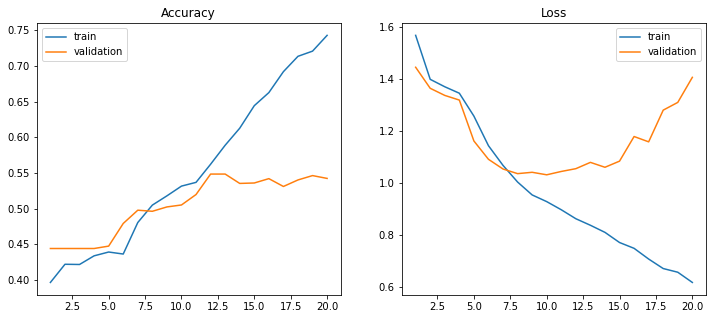

In [29]:
h=history.history
fig=plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Accuracy')
plt.plot(range(1,epoch+1),h['accuracy'],label='train')
plt.plot(range(1,epoch+1),h['val_accuracy'],label='validation')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss')
plt.plot(range(1,epoch+1),h['loss'],label='train')
plt.plot(range(1,epoch+1),h['val_loss'],label='validation')
plt.legend()
plt.show()

In [30]:
train,test,y_train,y_test=train_test_split(tokenized_text,df['Rating'],test_size=0.2,random_state=21)

In [31]:
model=Sequential()
model.add(Embedding(num_words,vector_space,input_length=length))
model.add(LSTM(32))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='relu'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 32)           640000    
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 256)               8448      
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 657,025
Trainable params: 657,025
Non-trainable params: 0
_________________________________________________________________


In [33]:
epoch=20
model.compile(optimizer='Adam',loss='mse',metrics='mae')
history=model.fit(train,y_train,epochs=epoch,batch_size=250,validation_split=0.2)

Epoch 1/20
53/53 [==============================] - 5s 68ms/step - loss: 6.4083 - mae: 2.0110 - val_loss: 1.5137 - val_mae: 0.9320
Epoch 2/20
53/53 [==============================] - 3s 63ms/step - loss: 1.4959 - mae: 0.9594 - val_loss: 1.4439 - val_mae: 0.9512
Epoch 3/20
53/53 [==============================] - 3s 63ms/step - loss: 1.4527 - mae: 0.9472 - val_loss: 1.4236 - val_mae: 0.9388
Epoch 4/20
53/53 [==============================] - 3s 62ms/step - loss: 1.3517 - mae: 0.9110 - val_loss: 1.0869 - val_mae: 0.8455
Epoch 5/20
53/53 [==============================] - 3s 63ms/step - loss: 0.8298 - mae: 0.7273 - val_loss: 0.7460 - val_mae: 0.6950
Epoch 6/20
53/53 [==============================] - 3s 63ms/step - loss: 0.5783 - mae: 0.6212 - val_loss: 0.6705 - val_mae: 0.6749
Epoch 7/20
53/53 [==============================] - 3s 63ms/step - loss: 0.4651 - mae: 0.5596 - val_loss: 0.7052 - val_mae: 0.6500
Epoch 8/20
53/53 [==============================] - 3s 63ms/step - loss: 0.4046 - m

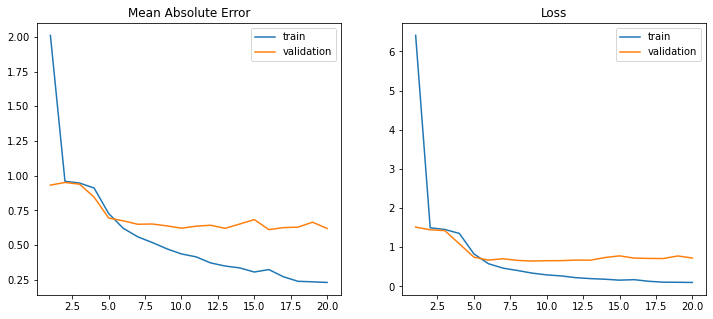

In [34]:
h=history.history
fig=plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Mean Absolute Error')
plt.plot(range(1,epoch+1),h['mae'],label='train')
plt.plot(range(1,epoch+1),h['val_mae'],label='validation')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss')
plt.plot(range(1,epoch+1),h['loss'],label='train')
plt.plot(range(1,epoch+1),h['val_loss'],label='validation')
plt.legend()
plt.show()

In [35]:
def get_preds(data,true_labels):
    pred=model.predict(data)
    h=[]
    for x in pred:
        if x-int(x)>=0.5:
            h.append(np.ceil(x))
        else :
            h.append(np.floor(x))
    print(pred[0:5])
    print(true_labels[:5])
    return accuracy_score(h,true_labels)

In [36]:
get_preds(train,y_train)

[[4.075413 ]
 [4.7228527]
 [2.112603 ]
 [4.053693 ]
 [3.9605172]]
10294    4
11753    5
16362    2
7074     4
14058    4
Name: Rating, dtype: int64


0.835285505124451

In [37]:
get_preds(test,y_test)

[[3.7904174]
 [4.4888306]
 [4.9037666]
 [4.790903 ]
 [4.300141 ]]
955      3
19500    5
19157    5
17671    5
17723    5
Name: Rating, dtype: int64


0.5279336423517931

In [110]:
#!pip install --upgrade xarray

In [111]:
#!pip install plotly

In [112]:
from wordcloud import WordCloud,STOPWORDS
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Flatten,Dropout,Embedding
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from nltk.stem import WordNetLemmatizer
from collections import Counter
import re

pd.set_option('max_colwidth', 400)

In [118]:
def unique_words(word,rating=None):
    words=[]
    stopwords=set(STOPWORDS)
    some_more_common_words=set(['hotel','room','rooms', ' n ', ' t '])
    stopwords.update(some_more_common_words)
    copy=hotel['Review']
    if rating!=None:
        copy=hotel[hotel['Rating']==rating]['Review']
    for y in copy:
        s=y.split(" ")
        for x in s:
            if x.isalpha() and x not in stopwords:
                words.append(x)
    return np.array(Counter(words).most_common(word))

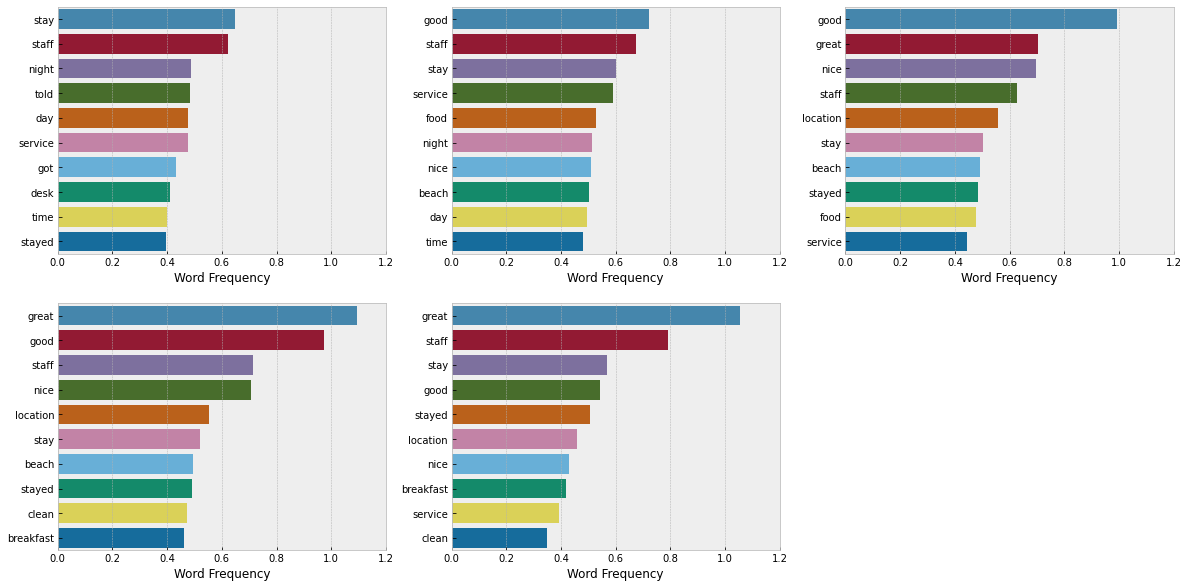

In [119]:
fig=plt.figure(figsize=(20,10))
counts=Counter(hotel['Rating'])
for rating in range(1,6):
    rated=unique_words(word=10,rating=rating)
    plt.subplot(2,3,rating)
    plt.xlabel('Word Frequency')
    plt.xlim([0,1.2])
    sns.barplot(y=rated[:,0],x=rated[:,1].astype(int)/counts[rating])
plt.show()

In [120]:
s=set()
stop=set(STOPWORDS)
lemma=WordNetLemmatizer()
for x in hotel['Review']:
    x=re.sub('[^A-Za-z]'," ",x)
    x=x.split(" ")
    for w in x:
        w=lemma.lemmatize(w)
        if w not in stop:
            s.add(w)
len(s)#number of distinct words

44760

In [121]:
def lemmatizer(x):
    x=re.sub('[^A-Za-z]',' ',x)
    s=x.split(" ")
    h=[]
    for y in s:
        y=lemma.lemmatize(y)
        if y not in stop:
            h.append(y)
    return " ".join(h)      

In [122]:
hotel1['lemm_text']=hotel['Review'].apply(lambda x: lemmatizer(x))

NameError: name 'hotel1' is not defined

In [ ]:
hotel1.head()

display(hotel['lemm_text'])

In [ ]:
num_words=20000
tokenizer=Tokenizer(num_words=num_words,oov_token='OOV')
tokenizer.fit_on_texts(hotel['lemm_text'])
tokenized_text=tokenizer.texts_to_sequences(hotel['lemm_text'])
np.mean([len(x) for x in tokenized_text])

In [ ]:
length=100
tokenized_text=pad_sequences(tokenized_text,length,padding='post',truncating='post')
output=to_categorical(hotel['Rating'])
output=output[:,1:]

# Row Count

In [ ]:
hotel.count()

## Min and Max of Text

## Explore NlP Text get word frequency

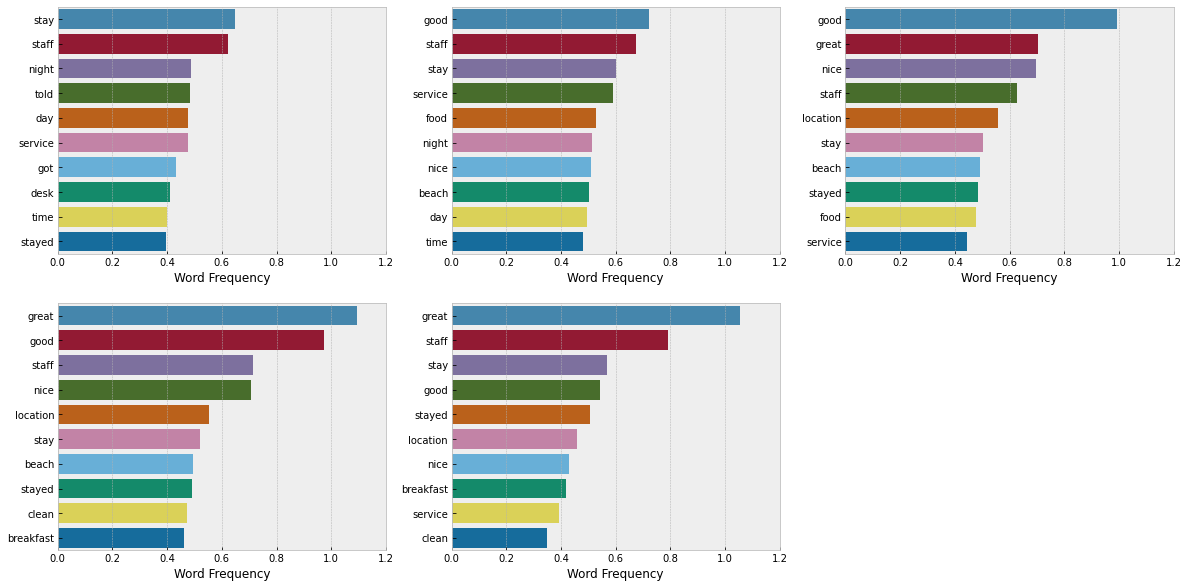

In [16]:
'''
# use explode to expand the lists into separate rows
hotel_dfe = hotel.lemm_text.explode().to_frame().reset_index(drop=True)

# groupby the values in the column, get the count and sort
hotel_dfg = hotel_dfe.groupby('lemm_text').lemm_text.count() \
                               .reset_index(name='count') \
                               .sort_values(['count'], ascending=False) \
                               .head(10).reset_index(drop=True)

display(hotel_dfg)

'''


fig=plt.figure(figsize=(20,10))
counts=Counter(hotel['Rating'])
for rating in range(1,6):
    rated=unique_words(word=10,rating=rating)
    plt.subplot(2,3,rating)
    plt.xlabel('Word Frequency')
    plt.xlim([0,1.2])
    sns.barplot(y=rated[:,0],x=rated[:,1].astype(int)/counts[rating])
plt.show()

## Count of all lemmatized Text. 

In [85]:
h=hotel

h['count']=hotel['lemm_text'].str.count(' ') + 1
h.head()

,Review,Rating,lemm_text,count
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy n...",4,nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous review valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillow soundproof heard music room night morning loud bang door opening closing hear people talking hallway maybe noisy neighbor aveda bath pr...,96
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroo...",2,ok nothing special charge diamond member hilton decided chain shot th anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard hotel room took printed reservation desk showed said thing tv couch ect desk clerk told oh mixed suite description kimpton website sorry free breakfast got kidding embassy suit sitting room bathroom bedroom unlike kim...,274
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book medit...",3,nice room experience hotel monaco seattle good hotel n t level positive large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed separate wakeup call concierge busy hard touch n t provide guidance special request tv hard use ipod sound dock suite non functioning decided book mediterranean sui...,263
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish named brandi enjoyed, did n't partake free wine coffee/tea service lobby thought great feature, great staff friendly, free wireless interne...",5,unique great stay wonderful time hotel monaco location excellent short stroll main downtown shopping area pet friendly room showed sign animal hair smell monaco suite sleeping area big striped curtain pulled closed nice touch felt cosy goldfish named brandi enjoyed n t partake free wine coffee tea service lobby thought great feature great staff friendly free wireless internet hotel wo...,103
4,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk package, no charge parking got voucher taxi, problem taxi driver did n't want accept voucher barely spoke english, funny thing speak arabic called started making comments girlfriend cell phone buddy, took second realize just said fact speak language ...",5,great stay great stay went seahawk game awesome downfall view building n t complain room huge staff helpful booked hotel website seahawk package charge parking got voucher taxi problem taxi driver n t want accept voucher barely spoke english funny thing speak arabic called started making comment girlfriend cell phone buddy took second realize said fact spea

### Sort the highest and lowest count of lemmatized text

In [94]:
h_count = h.sort_values('count')
h_count.tail(1)


,Review,Rating,lemm_text,count
7049,"false start good vacation secrets__Ç, false start good dominican vacationsunday 12/4/05 snow falling, it__Ç_é_ 0-dark-thirty newton ma airport shuttle cruises mass turnpike inbound boston__Ç_é_ logan airport, snow halos pike__Ç_é_ flood lamps swirls eddies vehicles road morning, we__Ç_ée instructed arrive 6:45 9:45 airline departure punta cana dominican republic gvw travel, lady true sun wors...",5,false start good vacation secret false start good dominican vacationsunday snow falling dark thirty newton ma airport shuttle cruise mass turnpike inbound boston logan airport snow halo pike flood lamp swirl eddy vehicle road morning e instructed arrive airline departure punta cana dominican republic gvw travel lady true sun worshipper l...,2744


In [95]:
h_count.head(1)

,Review,Rating,lemm_text,count
1501,"loved resort amazing space lot, not bored,",5,loved resort amazing space lot bored,10


In [96]:
#Get unique words

#unique = set(df['lemmatized'].str.lower().str.findall("\w+").sum())

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

In [20]:
from collections import Counter
from itertools import chain

counter = Counter(chain.from_iterable(map(str.split, hotel.lemm_text.tolist()))) 

In [21]:
series = pd.Series(counter).sort_values(ascending=False)
series

hotel       54050
room        47779
great       21485
t           19565
n           19112
            ...  
moyen           1
appeard         1
gorgeors        1
seem            1
swears          1
Length: 44759, dtype: int64

In [22]:
series.iloc[0:20]

hotel         54050
room          47779
great         21485
t             19565
n             19112
good          17491
staff         16706
stay          15601
night         14577
day           13484
time          12981
nice          12647
location      11560
service       10946
beach         10529
stayed        10502
restaurant    10485
breakfast     10135
food           9688
clean          9608
dtype: int64

https://sparkbyexamples.com/pandas/pandas-series-filter/#:~:text=By%20using%20Series.filter%20%28%29%20function%20you%20can%20filter,object%20whose%20index%20label%20name%20has%20a%20space.

In [99]:
# repeat this again at the end
# filter() index by labels

ser2 = series.filter(items = ['cost', 'price', 'criminal', 'crime', 'hooker', 'prostitute', 'drugs', 'inside','drug', 'food', 'pool'
                                'service', 'parking', 'size','space', 'ac', 'air', 'condition', 'location', 'smoking' , 'smoke', 'neighborhood'])

#cost, crime history, amenities, flexibility, parking, indoor facility, room space, air-conditioning, and neighborhood 
print(ser2)

cost             1460
price            4934
criminal           10
crime              26
hooker              8
prostitute         27
inside            661
drug               56
food             9688
parking          1694
size             2100
space            1301
ac                330
air              2054
condition         313
location        11560
smoking           683
smoke             371
neighborhood      513
dtype: int64


In [98]:
ser2.reset_index()

,index,0
0,cost,1460
1,price,4934
2,criminal,10
3,hooker,8
4,prostitute,27
5,inside,661
6,drug,56
7,food,9688
8,parking,1694
9,size,2100


<AxesSubplot:title={'center':'Count of Words in Hotel Review'}, ylabel='Count of Words'>

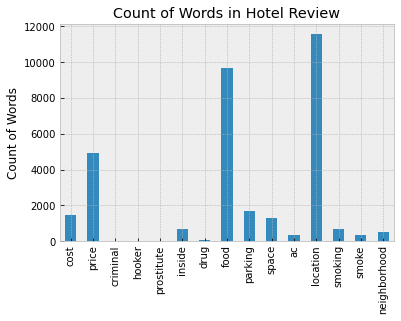

In [72]:
# create the bar plot
ax = ser2.plot(kind='bar')
# rotate xtick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
# set the y-axis label
ax.set_ylabel("Count of Words")
# set the title
ax.set_title("Count of Words in Hotel Review")
ser2.plot.bar(x='bar')

In [260]:


# plot the dataframe
#dfg.plot.bar(x='lemmatized')

## Now find most popular word groupings

# bigrams, # trigrams







In [164]:
# Creating a corpus to identify word groupings perform an overall training on the model. 
corpus_hotel = hotel['lemm_text'].str.cat(sep=',')


## Group Text by similar ratings

In [25]:
#hotel['Tag'] = tag_df['Rating'].astype(str)

grouped_text = hotel.groupby("Rating")['lemm_text'].apply(lambda hotel: ' '.join(hotel))
grouped_text1 = grouped_text.reset_index()
grouped_text1.head()

,Rating,lemm_text
0,1,horrible customer service hotel stay february rd th friend picked hotel monaco appealing website online package included champagne late checkout free valet gift spa weekend friend checked room hour earlier came later pulled valet young man stood asked valet open said pull bag didn offer help got garment bag suitcase came car key room number say valet car park car street pul...
1,2,ok nothing special charge diamond member hilton decided chain shot th anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard hotel room took printed reservation desk showed said thing tv couch ect desk clerk told oh mixed suite description kimpton website sorry free breakfast got kidding embassy suit sitting room bathroom bedroom unlike kim...
2,3,nice room experience hotel monaco seattle good hotel n t level positive large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed separate wakeup call concierge busy hard touch n t provide guidance special request tv hard use ipod sound dock suite non functioning decided book mediterranean sui...
3,4,nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous review valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillow soundproof heard music room night morning loud bang door opening closing hear people talking hallway maybe noisy neighbor aveda bath pr...
4,5,unique great stay wonderful time hotel monaco location excellent short stroll main downtown shopping area pet friendly room showed sign animal hair smell monaco suite sleeping area big striped curtain pulled closed nice touch felt cosy goldfish named brandi enjoyed n t partake free wine coffee tea service lobby thought great feature great staff friendly free wireless internet hotel wo...


## Find the most frequent words in each of the ratings
https://www.kaggle.com/code/octaviosantana/most-frequent-words

In [26]:
#df = grouped_text1
#df['Tags'] = grouped_text1.lemm_text.apply(lambda x: x[1:-1].split(','))

In [27]:
#df.head()

In [28]:
rating1 = grouped_text1[grouped_text1['Rating']==1]['lemm_text'].str.lower()
rating2 = grouped_text1[grouped_text1['Rating']==2]['lemm_text'].str.lower()
rating3 = grouped_text1[grouped_text1['Rating']==3]['lemm_text'].str.lower()
rating4 = grouped_text1[grouped_text1['Rating']==4]['lemm_text'].str.lower()
rating5 = grouped_text1[grouped_text1['Rating']==5]['lemm_text'].str.lower()

In [29]:
rating1 = rating1.values.tolist()
rating2 = rating2.values.tolist()
rating3 = rating3.values.tolist()
rating4 = rating4.values.tolist()
rating5 = rating5.values.tolist()

In [30]:
rating1_break = [nltk.tokenize.wordpunct_tokenize(text) for text in rating1]
rating2_break = [nltk.tokenize.wordpunct_tokenize(text) for text in rating2]
rating3_break = [nltk.tokenize.wordpunct_tokenize(text) for text in rating3]
rating4_break = [nltk.tokenize.wordpunct_tokenize(text) for text in rating4]
rating5_break = [nltk.tokenize.wordpunct_tokenize(text) for text in rating5]

In [31]:
#rating1_break

In [32]:
stopwords = nltk.corpus.stopwords.words('english')

In [33]:
from itertools import groupby

def clear_multiple_char(comment):        
    ti = []
    for words in comment:
        t = [''.join(["".join(i) for i, _ in groupby(word)]) if len(word)>10 else word for word in words]
        ti.append(t)
    return ti

In [34]:
'''def counter(comment_clear):
    cnt = Counter()
    for words in comment_clear:
        for word in words:
            cnt[word] += 1
    return cnt


'''
import string
from string import punctuation
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
punctuation = string.punctuation # '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
# Add numbers
punctuation += '0123456789'

def comment_raiz(comment):
    text = []
    for lista in comment:
        valids = [stemmer.stem(word) for word in lista if word not in stopwords and word not in punctuation 
                  and len(word)>2]
        valids_true = [''.join([char for char in word if char not in punctuation]) for word in valids if 
                       len(''.join([char for char in word if char not in punctuation]))>0]
        text.append(valids_true)
    return text

In [35]:
rating1_clearend = comment_raiz(rating1_break)
rating2_clearend = comment_raiz(rating2_break)
rating3_clearend = comment_raiz(rating3_break)
rating4_clearend = comment_raiz(rating4_break)
rating5_clearend = comment_raiz(rating5_break)

In [36]:
def counter(comment_clear):
    cnt = Counter()
    for words in comment_clear:
        for word in words:
            cnt[word] += 1
    return cnt

In [37]:
rating1_clearend_count = counter(rating1_clearend)
rating2_clearend_count = counter(rating2_clearend)
rating3_clearend_count = counter(rating3_clearend)
rating4_clearend_count = counter(rating4_clearend)
rating5_clearend_count = counter(rating5_clearend)

In [38]:
rating1_count = counter(rating1_break)
rating2_count = counter(rating2_break)
rating3_count = counter(rating3_break)
rating4_count = counter(rating4_break)
rating5_count = counter(rating5_break)


In [39]:
rating1_clearend_count.most_common(10)

[('room', 4308),
 ('hotel', 4020),
 ('stay', 2074),
 ('day', 1239),
 ('night', 1202),
 ('serv', 1052),
 ('staff', 1005),
 ('tim', 942),
 ('check', 792),
 ('plac', 791)]

In [40]:
rt1 = rating1_count.most_common(20)

In [41]:
from operator import itemgetter
import heapq
import collections
def least_common_values(array, to_find=None):
    counter = collections.Counter(array)
    if to_find is None:
        return sorted(counter.items(), key=itemgetter(1), reverse=False)
    return heapq.nsmallest(to_find, counter.items(), key=itemgetter(1))
#least_common_values(rating1_count)

In [42]:
rating2_clearend_count.most_common(20)

[('room', 5791),
 ('hotel', 4669),
 ('stay', 2556),
 ('night', 1641),
 ('day', 1608),
 ('good', 1553),
 ('serv', 1552),
 ('tim', 1404),
 ('staff', 1342),
 ('nic', 1191),
 ('food', 1177),
 ('resort', 1151),
 ('beach', 1142),
 ('loc', 1000),
 ('cle', 975),
 ('real', 972),
 ('bed', 967),
 ('gre', 947),
 ('resta', 909),
 ('check', 889)]

In [43]:
rating3_clearend_count.most_common(20)

[('room', 6147),
 ('hotel', 5634),
 ('stay', 2787),
 ('good', 2535),
 ('loc', 1966),
 ('nic', 1953),
 ('night', 1844),
 ('gre', 1787),
 ('day', 1543),
 ('staff', 1542),
 ('serv', 1490),
 ('tim', 1483),
 ('cle', 1424),
 ('beach', 1398),
 ('resort', 1253),
 ('food', 1241),
 ('resta', 1202),
 ('pool', 1162),
 ('real', 1146),
 ('walk', 1132)]

In [44]:
rating4_clearend_count.most_common(20)

[('hotel', 15548),
 ('room', 14320),
 ('stay', 8187),
 ('gre', 7626),
 ('good', 6912),
 ('loc', 5491),
 ('nic', 5275),
 ('staff', 4870),
 ('night', 4567),
 ('cle', 4051),
 ('day', 3991),
 ('tim', 3988),
 ('beach', 3789),
 ('walk', 3755),
 ('resta', 3576),
 ('serv', 3569),
 ('breakfast', 3356),
 ('food', 3146),
 ('real', 2992),
 ('plac', 2985)]

In [45]:
df= rating5_clearend_count.most_common(15)

In [46]:
df[0:20]

[('hotel', 24196),
 ('room', 17427),
 ('stay', 12960),
 ('gre', 10985),
 ('staff', 8059),
 ('loc', 6833),
 ('good', 5929),
 ('night', 5647),
 ('tim', 5287),
 ('serv', 5254),
 ('day', 5103),
 ('nic', 4997),
 ('walk', 4687),
 ('breakfast', 4591),
 ('cle', 4559)]

In [103]:
df1 = pd.DataFrame (rt1, columns = ['rating1_count', 'count'])

In [104]:
df1

,rating1_count,count
0,room,4300
1,hotel,4018
2,t,1731
3,n,1685
4,stay,1247
5,day,1239
6,night,1188
7,staff,993
8,time,935
9,service,895


### Convert all 5 text rows in ratings to corpus's
https://stackoverflow.com/questions/49088978/how-to-create-corpus-from-pandas-data-frame-to-operate-with-nltk

### Create tags from here: gather bigrams
https://stackoverflow.com/questions/2661778/tag-generation-from-a-text-content

In [105]:
df = grouped_text1
df.count()

Rating               5
lemm_text            5
tokenized_review     5
sent_token_length    5
tokenized_text       5
bigrams              5
dtype: int64

In [102]:
df1=df
def tokenize(text):
    """ basic tokenize method with word character, non word character and digits """
    text = re.sub(r" +", " ", str(text))
    text = re.split(r"(\d+|[a-zA-ZğüşıöçĞÜŞİÖÇ]+|\W)", text)
    text = re.compile(r"\W*\b\w{1,3}\b", text)
    text = list(filter(lambda x: x != '' and x != ' ', text))
    sent_tokenized = ' '.join(text)
    return sent_tokenized


# tokenize data
df1["tokenized_review"] = df.lemm_text.apply(lambda x: tokenize(x))
# calculate token count for any sent
df1["sent_token_length"] = df["tokenized_review"].apply(lambda x: len(x.split()))

TypeError: unhashable type: 'list'

In [82]:
df1.head()

,Rating,lemm_text,tokenized_review,sent_token_length,tokenized_text,bigrams
0,1,horrible customer service hotel stay february rd th friend picked hotel monaco appealing website online package included champagne late checkout free valet gift spa weekend friend checked room hour earlier came later pulled valet young man stood asked valet open said pull bag didn offer help got garment bag suitcase came car key room number say valet car park car street pul...,horrible customer service hotel stay february rd th friend picked hotel monaco appealing website online package included champagne late checkout free valet gift spa weekend friend checked room hour earlier came later pulled valet young man stood asked valet open said pull bag didn offer help got garment bag suitcase came car key room number say valet car park car street pull left key working a...,149613,"[horrible, customer, service, hotel, stay, february, rd, th, friend, picked, hotel, monaco, appealing, website, online, package, included, champagne, late, checkout, free, valet, gift, spa, weekend, friend, checked, room, hour, earlier, came, later, pulled, valet, young, man, stood, asked, valet, open, said, pull, bag, didn, offer, help, got, garment, bag, suitcase, came, car, key, room, numbe...","[(horrible, customer), (customer, service), (service, hotel), (hotel, stay), (stay, february), (february, rd), (rd, th), (th, friend), (friend, picked), (picked, hotel), (hotel, monaco), (monaco, appealing), (appealing, website), (website, online), (online, package), (package, included), (included, champagne), (champagne, late), (late, checkout), (checkout, free), (free, valet), (valet, gift),..."
1,2,ok nothing special charge diamond member hilton decided chain shot th anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard hotel room took printed reservation desk showed said thing tv couch ect desk clerk told oh mixed suite description kimpton website sorry free breakfast got kidding embassy suit sitting room bathroom bedroom unlike kim...,ok nothing special charge diamond member hilton decided chain shot th anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard hotel room took printed reservation desk showed said thing tv couch ect desk clerk told oh mixed suite description kimpton website sorry free breakfast got kidding embassy suit sitting room bathroom bedroom unlike kimpton ca...,213646,"[ok, nothing, special, charge, diamond, member, hilton, decided, chain, shot, th, anniversary, seattle, start, booked, suite, paid, extra, website, description, suite, bedroom, bathroom, standard, hotel, room, took, printed, reservation, desk, showed, said, thing, tv, couch, ect, desk, clerk, told, oh, mixed, suite, description, kimpton, website, sorry, free, breakfast, got, kidding, embassy, ...","[(ok, nothing), (nothing, special), (special, charge), (charge, diamond), (diamond, member), (member, hilton), (hilton, decided), (decided, chain), (chain, shot), (shot, th), (th, anniversary), (anniversary, seattle), (seattle, start), (start, booked), (booked, suite), (suite, paid), (paid, extra), (extra, website), (website, description), (description, suite), (suite, bedroom), (bedroom, bath..."
2,3,nice room experience hotel monaco seattle good hotel n t level positive large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed separate wakeup call concierge busy hard touch n t provide guidance special request tv hard use ipod sound dock suite non functioning decided book mediterranean sui...,nice room experience hotel monaco seattle good hotel n t level positive large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed separate wakeup call concierge busy hard touch n t provide guidance special request tv hard use ipod sound do

### count the tokens per rating

In [52]:
from nltk.tokenize import word_tokenize
df1['tokenized_text'] = df['lemm_text'].apply(word_tokenize) 

In [53]:
df1.head()

,Rating,lemm_text,tokenized_review,sent_token_length,tokenized_text
0,1,horrible customer service hotel stay february rd th friend picked hotel monaco appealing website online package included champagne late checkout free valet gift spa weekend friend checked room hour earlier came later pulled valet young man stood asked valet open said pull bag didn offer help got garment bag suitcase came car key room number say valet car park car street pul...,horrible customer service hotel stay february rd th friend picked hotel monaco appealing website online package included champagne late checkout free valet gift spa weekend friend checked room hour earlier came later pulled valet young man stood asked valet open said pull bag didn offer help got garment bag suitcase came car key room number say valet car park car street pull left key working a...,149613,"[horrible, customer, service, hotel, stay, february, rd, th, friend, picked, hotel, monaco, appealing, website, online, package, included, champagne, late, checkout, free, valet, gift, spa, weekend, friend, checked, room, hour, earlier, came, later, pulled, valet, young, man, stood, asked, valet, open, said, pull, bag, didn, offer, help, got, garment, bag, suitcase, came, car, key, room, numbe..."
1,2,ok nothing special charge diamond member hilton decided chain shot th anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard hotel room took printed reservation desk showed said thing tv couch ect desk clerk told oh mixed suite description kimpton website sorry free breakfast got kidding embassy suit sitting room bathroom bedroom unlike kim...,ok nothing special charge diamond member hilton decided chain shot th anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard hotel room took printed reservation desk showed said thing tv couch ect desk clerk told oh mixed suite description kimpton website sorry free breakfast got kidding embassy suit sitting room bathroom bedroom unlike kimpton ca...,213646,"[ok, nothing, special, charge, diamond, member, hilton, decided, chain, shot, th, anniversary, seattle, start, booked, suite, paid, extra, website, description, suite, bedroom, bathroom, standard, hotel, room, took, printed, reservation, desk, showed, said, thing, tv, couch, ect, desk, clerk, told, oh, mixed, suite, description, kimpton, website, sorry, free, breakfast, got, kidding, embassy, ..."
2,3,nice room experience hotel monaco seattle good hotel n t level positive large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed separate wakeup call concierge busy hard touch n t provide guidance special request tv hard use ipod sound dock suite non functioning decided book mediterranean sui...,nice room experience hotel monaco seattle good hotel n t level positive large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed separate wakeup call concierge busy hard touch n t provide guidance special request tv hard use ipod sound dock suite non functioning decided book mediterranean suite night wee...,237509,"[nice, room, experience, hotel, monaco, seattle, good, hotel, n, t, level, positive, large, bathroom, mediterranean, suite, comfortable, bed, pillowsattentive, housekeeping, staffnegatives, ac, unit, malfunctioned, stay, desk, disorganized, missed, separate, wakeup, call, concierge, busy, hard, touch, n, t, provide, guidance, special, request, tv, hard, use, ipod, sound, dock, suite, non, func..."
3,4,nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous review valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillow soundproof heard music room night morning loud bang door opening closing h

In [54]:

df1['bigrams'] = df1['tokenized_text'].apply(lambda row: list(nltk.ngrams(row, 2)))

In [55]:
df1.head()

,Rating,lemm_text,tokenized_review,sent_token_length,tokenized_text,bigrams
0,1,horrible customer service hotel stay february rd th friend picked hotel monaco appealing website online package included champagne late checkout free valet gift spa weekend friend checked room hour earlier came later pulled valet young man stood asked valet open said pull bag didn offer help got garment bag suitcase came car key room number say valet car park car street pul...,horrible customer service hotel stay february rd th friend picked hotel monaco appealing website online package included champagne late checkout free valet gift spa weekend friend checked room hour earlier came later pulled valet young man stood asked valet open said pull bag didn offer help got garment bag suitcase came car key room number say valet car park car street pull left key working a...,149613,"[horrible, customer, service, hotel, stay, february, rd, th, friend, picked, hotel, monaco, appealing, website, online, package, included, champagne, late, checkout, free, valet, gift, spa, weekend, friend, checked, room, hour, earlier, came, later, pulled, valet, young, man, stood, asked, valet, open, said, pull, bag, didn, offer, help, got, garment, bag, suitcase, came, car, key, room, numbe...","[(horrible, customer), (customer, service), (service, hotel), (hotel, stay), (stay, february), (february, rd), (rd, th), (th, friend), (friend, picked), (picked, hotel), (hotel, monaco), (monaco, appealing), (appealing, website), (website, online), (online, package), (package, included), (included, champagne), (champagne, late), (late, checkout), (checkout, free), (free, valet), (valet, gift),..."
1,2,ok nothing special charge diamond member hilton decided chain shot th anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard hotel room took printed reservation desk showed said thing tv couch ect desk clerk told oh mixed suite description kimpton website sorry free breakfast got kidding embassy suit sitting room bathroom bedroom unlike kim...,ok nothing special charge diamond member hilton decided chain shot th anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard hotel room took printed reservation desk showed said thing tv couch ect desk clerk told oh mixed suite description kimpton website sorry free breakfast got kidding embassy suit sitting room bathroom bedroom unlike kimpton ca...,213646,"[ok, nothing, special, charge, diamond, member, hilton, decided, chain, shot, th, anniversary, seattle, start, booked, suite, paid, extra, website, description, suite, bedroom, bathroom, standard, hotel, room, took, printed, reservation, desk, showed, said, thing, tv, couch, ect, desk, clerk, told, oh, mixed, suite, description, kimpton, website, sorry, free, breakfast, got, kidding, embassy, ...","[(ok, nothing), (nothing, special), (special, charge), (charge, diamond), (diamond, member), (member, hilton), (hilton, decided), (decided, chain), (chain, shot), (shot, th), (th, anniversary), (anniversary, seattle), (seattle, start), (start, booked), (booked, suite), (suite, paid), (paid, extra), (extra, website), (website, description), (description, suite), (suite, bedroom), (bedroom, bath..."
2,3,nice room experience hotel monaco seattle good hotel n t level positive large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed separate wakeup call concierge busy hard touch n t provide guidance special request tv hard use ipod sound dock suite non functioning decided book mediterranean sui...,nice room experience hotel monaco seattle good hotel n t level positive large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed separate wakeup call concierge busy hard touch n t provide guidance special request tv hard use ipod sound do

In [56]:
df1.to_csv('trip_advisr_tokens_bigrams.csv')

In [57]:
df2 = df1['bigrams']
df2 = df1.groupby('Rating').agg({'bigrams': 'sum'})

# Compute the most frequent bigrams by category
from collections import Counter
df2['bigrams_counter'] = df2.bigrams.apply(lambda row: Counter(row)).to_frame()

In [58]:
df2.head(1)

,bigrams,bigrams_counter
Rating,,
1,"[(horrible, customer), (customer, service), (service, hotel), (hotel, stay), (stay, february), (february, rd), (rd, th), (th, friend), (friend, picked), (picked, hotel), (hotel, monaco), (monaco, appealing), (appealing, website), (website, online), (online, package), (package, included), (included, champagne), (champagne, late), (late, checkout), (checkout, free), (free, valet), (valet, gift),...","{('horrible', 'customer'): 7, ('customer', 'service'): 108, ('service', 'hotel'): 29, ('hotel', 'stay'): 52, ('stay', 'february'): 1, ('february', 'rd'): 1, ('rd', 'th'): 2, ('th', 'friend'): 1, ('friend', 'picked'): 1, ('picked', 'hotel'): 2, ('hotel', 'monaco'): 1, ('monaco', 'appealing'): 1, ('appealing', 'website'): 1, ('website', 'online'): 2, ('online', 'package'): 1, ('package', 'includ..."


In [59]:
df3 = df2.reset_index()

In [60]:
df3.dtypes

Rating              int64
bigrams            object
bigrams_counter    object
dtype: object

In [61]:
df3.to_csv('trip_advisor_bigrams.csv')

In [62]:
rating1_bigram = df3[df3['Rating']==1]['bigrams']
rating2_bigram = df3[df3['Rating']==2]['bigrams']
rating3_bigram = df3[df3['Rating']==3]['bigrams']
rating4_bigram = df3[df3['Rating']==4]['bigrams']
rating5_bigram = df3[df3['Rating']==5]['bigrams']


In [63]:
def counter(comment_clear):
    cnt = Counter()
    for words in comment_clear:
        for word in words:
            cnt[word] += 1
    return cnt

In [64]:
rating1_bigram_count = counter(rating1_bigram)
rating2_bigram_count = counter(rating2_bigram)
rating3_bigram_count = counter(rating3_bigram)
rating4_bigram_count = counter(rating4_bigram)
rating5_bigram_count = counter(rating5_bigram)


In [65]:
rating1_bigram_count = pd.DataFrame(rating1_bigram_count.most_common(30), columns=['bigrams','count'])
rating2_bigram_count = pd.DataFrame(rating2_bigram_count.most_common(30), columns=['bigrams','count'])
rating3_bigram_count = pd.DataFrame(rating3_bigram_count.most_common(30), columns=['bigrams','count'])
rating4_bigram_count = pd.DataFrame(rating4_bigram_count.most_common(30), columns=['bigrams','count'])
rating5_bigram_count = pd.DataFrame(rating5_bigram_count.most_common(30), columns=['bigrams','count'])

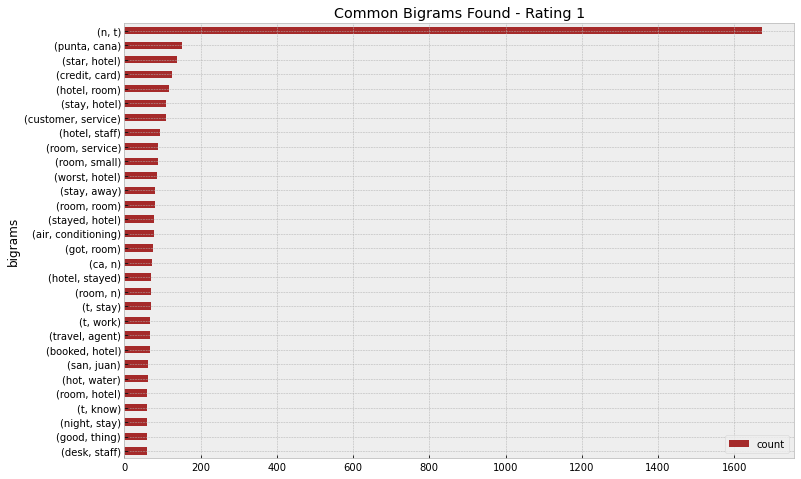

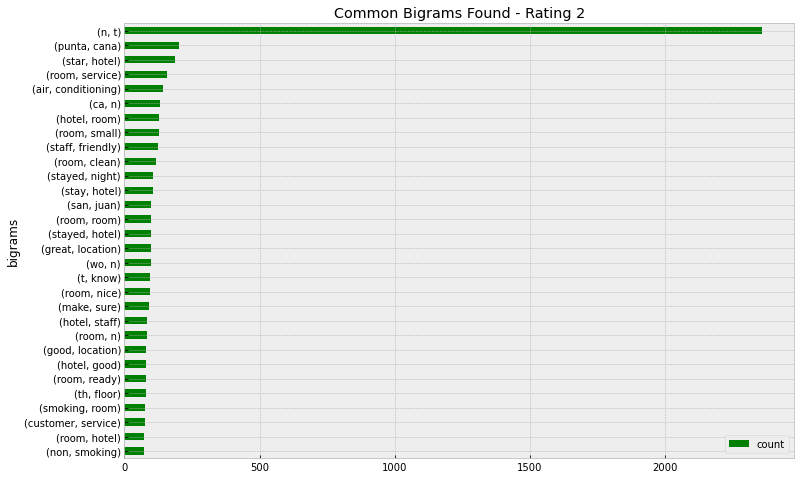

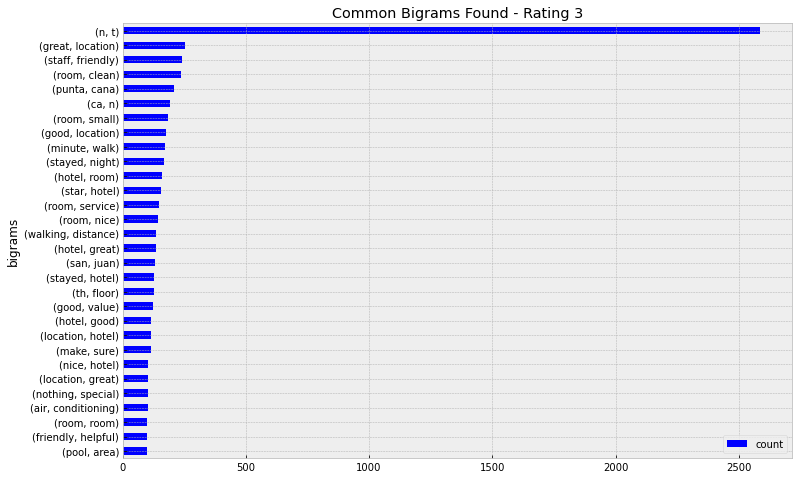

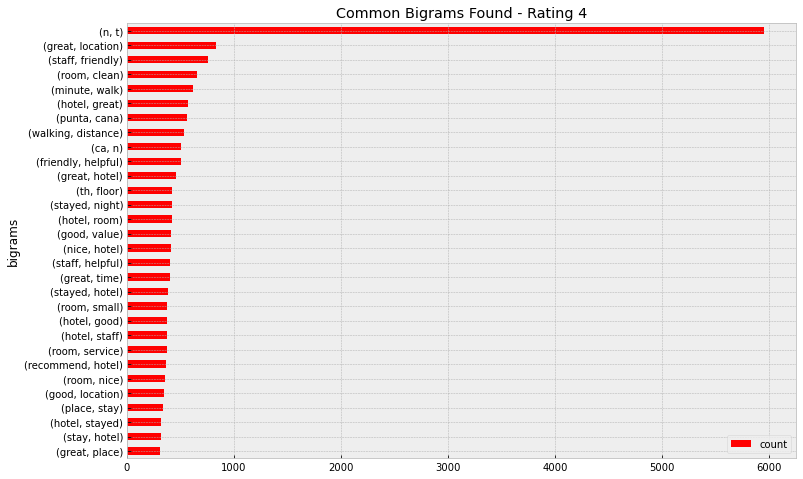

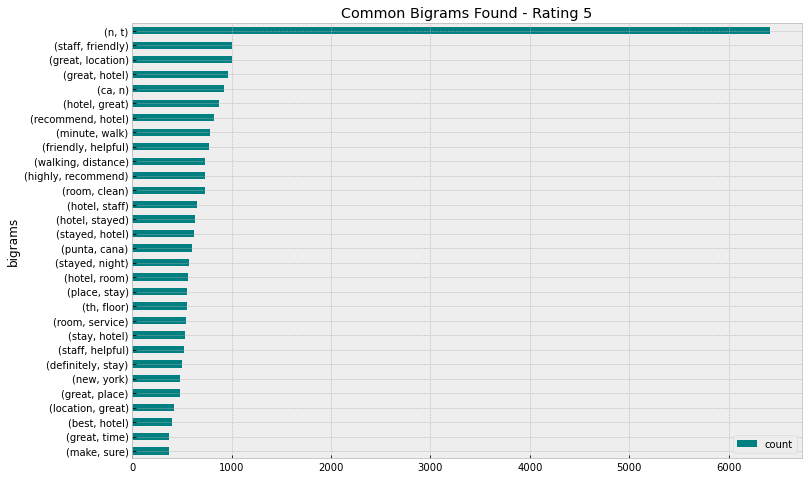

In [66]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
rating1_bigram_count.sort_values(by='count').plot.barh(x='bigrams',
                      y='count',
                      ax=ax,
                      color="brown")
ax.set_title("Common Bigrams Found - Rating 1")
plt.show()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
rating2_bigram_count.sort_values(by='count').plot.barh(x='bigrams',
                      y='count',
                      ax=ax,
                      color="green")
ax.set_title("Common Bigrams Found - Rating 2")
plt.show()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
rating3_bigram_count.sort_values(by='count').plot.barh(x='bigrams',
                      y='count',
                      ax=ax,
                      color="blue")
ax.set_title("Common Bigrams Found - Rating 3")
plt.show()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
rating4_bigram_count.sort_values(by='count').plot.barh(x='bigrams',
                      y='count',
                      ax=ax,
                      color="red")
ax.set_title("Common Bigrams Found - Rating 4")
plt.show()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
rating5_bigram_count.sort_values(by='count').plot.barh(x='bigrams',
                      y='count',
                      ax=ax,
                      color="teal")
ax.set_title("Common Bigrams Found - Rating 5")
plt.show()

#  Scrap Ideas and examples: Below

In [67]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def _get_top_ngram(corpus, n=None):
    #getting top ngrams
    vec = CountVectorizer(ngram_range=(n, n),
                          max_df=0.9,
                          ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:15]

# unigram
fig = make_subplots(rows=1, cols=5)

title_ = ["1", "2", "3", "4", "5"]

for i in range(5):
    texts = df[df["Rating"] == i]['lemm_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    top_n_bigrams = _get_top_ngram(texts, 2)[:15]
    x, y = map(list, zip(*top_n_bigrams))


    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='Most Common unigrams per Classes',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))      
fig.show()

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:


def CreateCorpusFromDataFrame(corpusfolder,df):
    for index, r in df.iterrows():
        #id=r['ID']
        title=r['rating1_count']
        #body=r['BODY']
        #category=r['CATEGORY']
        fname=str(title)+'_'+'.txt'
        corpusfile=open(corpusfolder+fname,'a')
        corpusfile.write(str(title) +" " +str(title))
        corpusfile.close()

CreateCorpusFromDataFrame('',df1)

In [ ]:
import nltk
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

# change this to read in your data
finder = BigramCollocationFinder.from_words(
   nltk.corpus.genesis.words('english-web.txt'))

# only bigrams that appear 3+ times
finder.apply_freq_filter(3) 

# return the 5 n-grams with the highest PMI
finder.nbest(bigram_measures.pmi, 5) 

In [68]:
#from collections import Counter
#Counter(" ".join(grouped_text1["lemm_text"]).split()).most_common(100)

## We need to generate a TAG column 
Exploring these documents: 

https://www.kaggle.com/code/matleonard/text-classification/notebook

https://www.kaggle.com/code/mihirprajapati01/nlp-assignment

https://stackoverflow.com/questions/2661778/tag-generation-from-a-text-content

SyntaxError: invalid syntax (Temp/ipykernel_21952/3959575968.py, line 1)

In [7]:
'''import nltk
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

# change this to read in your data
finder = BigramCollocationFinder.from_words(
   nltk.corpus.genesis.words('english-web.txt'))

# only bigrams that appear 3+ times
finder.apply_freq_filter(3) 

# return the 5 n-grams with the highest PMI
finder.nbest(bigram_measures.pmi, 6)  '''


"import nltk\nfrom nltk.collocations import *\nbigram_measures = nltk.collocations.BigramAssocMeasures()\n\n# change this to read in your data\nfinder = BigramCollocationFinder.from_words(\n   nltk.corpus.genesis.words('english-web.txt'))\n\n# only bigrams that appear 3+ times\nfinder.apply_freq_filter(3) \n\n# return the 5 n-grams with the highest PMI\nfinder.nbest(bigram_measures.pmi, 6)  "

In [15]:
import spacy

# Create an empty model
nlp = spacy.blank("en")

# Add the TextCategorizer to the empty model
textcat = nlp.add_pipe("textcat")

In [16]:
# Add labels to text classifier
textcat.add_label("ham")
textcat.add_label("spam")

1

In [17]:
train_texts = spam['text'].values
train_labels = [{'cats': {'ham': label == 'ham',
                          'spam': label == 'spam'}} 
                for label in spam['label']]

NameError: name 'spam' is not defined

##  Not part of our objective.

## These are the Preparation for Predictions: Keeping for reference to source. 

In [25]:
train,test,y_train,y_test=train_test_split(tokenized_text,output,test_size=0.2,random_state=21)

In [26]:
vector_space=32
model=Sequential()
model.add(Embedding(num_words,vector_space,input_length=length))
model.add(LSTM(16,return_sequences=True,recurrent_dropout=0.2))
model.add(LSTM(16,return_sequences=True,recurrent_dropout=0.2))
model.add(LSTM(32))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5,activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           640000    
                                                                 
 lstm (LSTM)                 (None, 100, 16)           3136      
                                                                 
 lstm_1 (LSTM)               (None, 100, 16)           2112      
                                                                 
 lstm_2 (LSTM)               (None, 32)                6272      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2

In [28]:
epoch=20
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train,y_train,validation_split=0.2,epochs=epoch,batch_size=1000)

Epoch 1/20
14/14 [==============================] - 10s 468ms/step - loss: 1.5676 - accuracy: 0.3965 - val_loss: 1.4449 - val_accuracy: 0.4440
Epoch 2/20
14/14 [==============================] - 6s 416ms/step - loss: 1.3984 - accuracy: 0.4219 - val_loss: 1.3639 - val_accuracy: 0.4440
Epoch 3/20
14/14 [==============================] - 6s 430ms/step - loss: 1.3699 - accuracy: 0.4216 - val_loss: 1.3366 - val_accuracy: 0.4440
Epoch 4/20
14/14 [==============================] - 6s 446ms/step - loss: 1.3450 - accuracy: 0.4338 - val_loss: 1.3186 - val_accuracy: 0.4440
Epoch 5/20
14/14 [==============================] - 6s 461ms/step - loss: 1.2570 - accuracy: 0.4391 - val_loss: 1.1613 - val_accuracy: 0.4474
Epoch 6/20
14/14 [==============================] - 7s 473ms/step - loss: 1.1432 - accuracy: 0.4363 - val_loss: 1.0909 - val_accuracy: 0.4791
Epoch 7/20
14/14 [==============================] - 7s 484ms/step - loss: 1.0674 - accuracy: 0.4804 - val_loss: 1.0535 - val_accuracy: 0.4977
Epoch

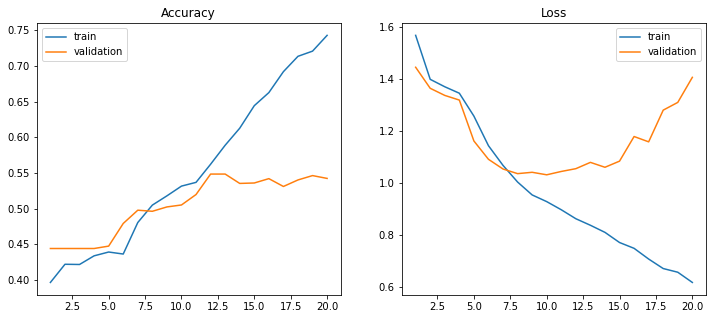

In [29]:
h=history.history
fig=plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Accuracy')
plt.plot(range(1,epoch+1),h['accuracy'],label='train')
plt.plot(range(1,epoch+1),h['val_accuracy'],label='validation')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss')
plt.plot(range(1,epoch+1),h['loss'],label='train')
plt.plot(range(1,epoch+1),h['val_loss'],label='validation')
plt.legend()
plt.show()

In [30]:
train,test,y_train,y_test=train_test_split(tokenized_text,df['Rating'],test_size=0.2,random_state=21)

In [31]:
model=Sequential()
model.add(Embedding(num_words,vector_space,input_length=length))
model.add(LSTM(32))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='relu'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 32)           640000    
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 256)               8448      
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 657,025
Trainable params: 657,025
Non-trainable params: 0
_________________________________________________________________


In [33]:
epoch=20
model.compile(optimizer='Adam',loss='mse',metrics='mae')
history=model.fit(train,y_train,epochs=epoch,batch_size=250,validation_split=0.2)

Epoch 1/20
53/53 [==============================] - 5s 68ms/step - loss: 6.4083 - mae: 2.0110 - val_loss: 1.5137 - val_mae: 0.9320
Epoch 2/20
53/53 [==============================] - 3s 63ms/step - loss: 1.4959 - mae: 0.9594 - val_loss: 1.4439 - val_mae: 0.9512
Epoch 3/20
53/53 [==============================] - 3s 63ms/step - loss: 1.4527 - mae: 0.9472 - val_loss: 1.4236 - val_mae: 0.9388
Epoch 4/20
53/53 [==============================] - 3s 62ms/step - loss: 1.3517 - mae: 0.9110 - val_loss: 1.0869 - val_mae: 0.8455
Epoch 5/20
53/53 [==============================] - 3s 63ms/step - loss: 0.8298 - mae: 0.7273 - val_loss: 0.7460 - val_mae: 0.6950
Epoch 6/20
53/53 [==============================] - 3s 63ms/step - loss: 0.5783 - mae: 0.6212 - val_loss: 0.6705 - val_mae: 0.6749
Epoch 7/20
53/53 [==============================] - 3s 63ms/step - loss: 0.4651 - mae: 0.5596 - val_loss: 0.7052 - val_mae: 0.6500
Epoch 8/20
53/53 [==============================] - 3s 63ms/step - loss: 0.4046 - m

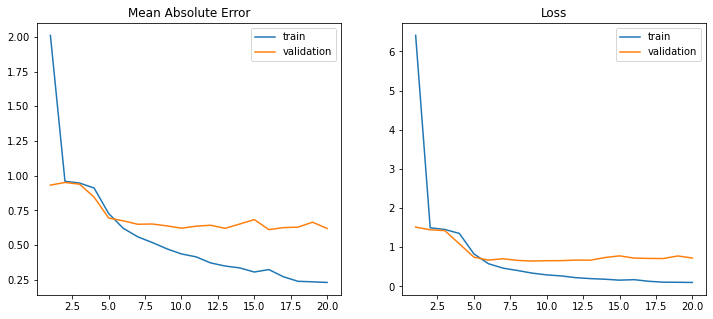

In [34]:
h=history.history
fig=plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Mean Absolute Error')
plt.plot(range(1,epoch+1),h['mae'],label='train')
plt.plot(range(1,epoch+1),h['val_mae'],label='validation')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss')
plt.plot(range(1,epoch+1),h['loss'],label='train')
plt.plot(range(1,epoch+1),h['val_loss'],label='validation')
plt.legend()
plt.show()

In [35]:
def get_preds(data,true_labels):
    pred=model.predict(data)
    h=[]
    for x in pred:
        if x-int(x)>=0.5:
            h.append(np.ceil(x))
        else :
            h.append(np.floor(x))
    print(pred[0:5])
    print(true_labels[:5])
    return accuracy_score(h,true_labels)

In [36]:
get_preds(train,y_train)

[[4.075413 ]
 [4.7228527]
 [2.112603 ]
 [4.053693 ]
 [3.9605172]]
10294    4
11753    5
16362    2
7074     4
14058    4
Name: Rating, dtype: int64


0.835285505124451

In [37]:
get_preds(test,y_test)

[[3.7904174]
 [4.4888306]
 [4.9037666]
 [4.790903 ]
 [4.300141 ]]
955      3
19500    5
19157    5
17671    5
17723    5
Name: Rating, dtype: int64


0.5279336423517931